# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [88]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the Seaborn default theme
sns.set_theme()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
# Connecting google drive to google colab
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading stock data
stockdata = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/unsupervised_learning/project_7/stock_data.csv')

stockdata.head(10)

Ticker Symbol                   Security             GICS Sector  \
0           AAL    American Airlines Group             Industrials   
1          ABBV                     AbbVie             Health Care   
2           ABT        Abbott Laboratories             Health Care   
3          ADBE          Adobe Systems Inc  Information Technology   
4           ADI       Analog Devices, Inc.  Information Technology   
5           ADM  Archer-Daniels-Midland Co        Consumer Staples   
6           ADS      Alliance Data Systems  Information Technology   
7           AEE                Ameren Corp               Utilities   
8           AEP    American Electric Power               Utilities   
9           AFL                  AFLAC Inc              Financials   

                       GICS Sub Industry  Current Price  Price Change  \
0                               Airlines      42.349998      9.999995   
1                        Pharmaceuticals      59.240002      8.339433   
2                  Health Care Equipment      44.910000     11.301121   
3                   Application Software      93.940002     13.977195   
4                         Semiconductors      55.320000     -1.827858   
5                  Agricultural Products      36.680000    -12.017268   
6  Data Processing & Outsourced Services     276.570007      6.189286   
7                         MultiUtilities      43.230000      2.174424   
8                     Electric Utilities      58.270000      2.371753   
9                Life & Health Insurance      59.900002      3.027181   

   Volatility  ROE  Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0    1.687151  135          51     -604000000  7610000000               11.39   
1    2.197887  130          77       51000000  5144000000                3.15   
2    1.273646   21          67      938000000  4423000000                2.94   
3    1.357679    9         180     -240840000   629551000                1.26   
4    1.701169   14         272      315120000   696878000                0.31   
5    1.516493   10          49     -189000000  1849000000                2.99   
6    1.116976   30          25       90885000   596541000                8.91   
7    1.124186    9          14      287000000   636000000                2.60   
8    1.068485   11           9       13900000  2052300000                3.13   
9    1.048295   14          99     -308000000  2533000000                5.88   

   Estimated Shares Outstanding   P/E Ratio   P/B Ratio  
0                  6.681299e+08    3.718174   -8.784219  
1                  1.633016e+09   18.806350   -8.750068  
2                  1.504422e+09   15.275510   -0.394171  
3                  4.996437e+08   74.555557    4.199651  
4                  2.247994e+09  178.451613    1.059810  
5                  6.183946e+08   12.267559    7.496831  
6                  6.695185e+07   31.040405  129.064585  
7                  2.446154e+08   16.626923   -0.719497  
8                  4.218978e+08   18.456543   -3.022649  
9                  4.307823e+08   10.187075   -1.883912

## Data Overview

- Observations
- Sanity checks

In [4]:
stockdata.shape

(340, 15)

There are 340 rows and 15 columns in the stock dataframe provided by Trade&Ahead.

In [5]:
# viewing a random sample of the dataset
stockdata.sample(n=10, random_state=1)

Ticker Symbol                     Security             GICS Sector  \
102           DVN           Devon Energy Corp.                  Energy   
125            FB                     Facebook  Information Technology   
11            AIV  Apartment Investment & Mgmt             Real Estate   
248            PG             Procter & Gamble        Consumer Staples   
238           OXY         Occidental Petroleum                  Energy   
336           YUM              Yum! Brands Inc  Consumer Discretionary   
112           EQT              EQT Corporation                  Energy   
147           HAL              Halliburton Co.                  Energy   
89            DFS  Discover Financial Services              Financials   
173           IVZ                 Invesco Ltd.              Financials   

                      GICS Sub Industry  Current Price  Price Change  \
102  Oil & Gas Exploration & Production      32.000000    -15.478079   
125        Internet Software & Services     104.660004     16.224320   
11                                REITs      40.029999      7.578608   
248                   Personal Products      79.410004     10.660538   
238  Oil & Gas Exploration & Production      67.610001      0.865287   
336                         Restaurants      52.516175     -8.698917   
112  Oil & Gas Exploration & Production      52.130001    -21.253771   
147      Oil & Gas Equipment & Services      34.040001     -5.101751   
89                     Consumer Finance      53.619999      3.653584   
173    Asset Management & Custody Banks      33.480000      7.067477   

     Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
102    2.923698  205          70      830000000 -14454000000   
125    1.320606    8         958      592000000   3669000000   
11     1.163334   15          47       21818000    248710000   
248    0.806056   17         129      160383000    636056000   
238    1.589520   32          64     -588000000  -7829000000   
336    1.478877  142          27      159000000   1293000000   
112    2.364883    2         201      523803000     85171000   
147    1.966062    4         189     7786000000   -671000000   
89     1.159897   20          99     2288000000   2297000000   
173    1.580839   12          67      412000000    968100000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
102              -35.55                  4.065823e+08  93.089287   1.785616  
125                1.31                  2.800763e+09  79.893133   5.884467  
11                 1.52                  1.636250e+08  26.335526  -1.269332  
248                3.28                  4.913916e+08  24.070121  -2.256747  
238              -10.23                  7.652981e+08  93.089287   3.345102  
336                2.97                  4.353535e+08  17.682214  -3.838260  
112                0.56                  1.520911e+08  93.089287   9.567952  
147               -0.79                  8.493671e+08  93.089287  17.345857  
89                 5.14                  4.468872e+08  10.431906  -0.375934  
173                2.26                  4.283628e+08  14.814159   4.218620

This is a random selection of data presented in the table above. The presentation looks good but the column titles require a cleanup

In [4]:
# copying the data to another variable to avoid any changes to original data
df = stockdata.copy()

In [5]:
# fixing column names
df.columns = [c.replace(" ", "_") for c in df.columns]

In [6]:
# dropping the ticker symbol column as it is not relevant at this point.
df.drop("Ticker_Symbol", axis=1, inplace=True)

**Checking the data types of the columns for the dataset**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Security                      340 non-null    object 
 1   GICS_Sector                   340 non-null    object 
 2   GICS_Sub_Industry             340 non-null    object 
 3   Current_Price                 340 non-null    float64
 4   Price_Change                  340 non-null    float64
 5   Volatility                    340 non-null    float64
 6   ROE                           340 non-null    int64  
 7   Cash_Ratio                    340 non-null    int64  
 8   Net_Cash_Flow                 340 non-null    int64  
 9   Net_Income                    340 non-null    int64  
 10  Earnings_Per_Share            340 non-null    float64
 11  Estimated_Shares_Outstanding  340 non-null    float64
 12  P/E_Ratio                     340 non-null    float64
 13  P/B_R

After dropping the Ticker symbol column, now we have 14 columns. The rows remians 340 in total while the datatypes include objects, floats and integers.

**Let's take a look at the summary of the data**

In [8]:
df.describe()

Current_Price  Price_Change  Volatility         ROE  Cash_Ratio  \
count     340.000000    340.000000  340.000000  340.000000  340.000000   
mean       80.862345      4.078194    1.525976   39.597059   70.023529   
std        98.055086     12.006338    0.591798   96.547538   90.421331   
min         4.500000    -47.129693    0.733163    1.000000    0.000000   
25%        38.555000     -0.939484    1.134878    9.750000   18.000000   
50%        59.705000      4.819505    1.385593   15.000000   47.000000   
75%        92.880001     10.695493    1.695549   27.000000   99.000000   
max      1274.949951     55.051683    4.580042  917.000000  958.000000   

       Net_Cash_Flow    Net_Income  Earnings_Per_Share  \
count   3.400000e+02  3.400000e+02          340.000000   
mean    5.553762e+07  1.494385e+09            2.776662   
std     1.946365e+09  3.940150e+09            6.587779   
min    -1.120800e+10 -2.352800e+10          -61.200000   
25%    -1.939065e+08  3.523012e+08            1.557500   
50%     2.098000e+06  7.073360e+08            2.895000   
75%     1.698108e+08  1.899000e+09            4.620000   
max     2.076400e+10  2.444200e+10           50.090000   

       Estimated_Shares_Outstanding   P/E_Ratio   P/B_Ratio  
count                  3.400000e+02  340.000000  340.000000  
mean                   5.770283e+08   32.612563   -1.718249  
std                    8.458496e+08   44.348731   13.966912  
min                    2.767216e+07    2.935451  -76.119077  
25%                    1.588482e+08   15.044653   -4.352056  
50%                    3.096751e+08   20.819876   -1.067170  
75%                    5.731175e+08   31.764755    3.917066  
max                    6.159292e+09  528.039074  129.064585

*   The average stock current price is 80.86 dollars.
*   The average change in stock price is 4.1 percent.
*   The average volatility measures 1.53 percent.
*   The average ROE 39.6 dollars
*   The average cash ratio is 70
*   The average net cash flow is 55,537,620
*   The average net income is 1,494,385,000
*   The average earnings per share is 2.78
*   Average estimated shares outstanding is 577,028,300

The minimum cash ratio is zero.

**Let's check for missing values since the minimum cash ratio is zero**

In [9]:
# checking for missing values
df.isna().sum()

Security                        0
GICS_Sector                     0
GICS_Sub_Industry               0
Current_Price                   0
Price_Change                    0
Volatility                      0
ROE                             0
Cash_Ratio                      0
Net_Cash_Flow                   0
Net_Income                      0
Earnings_Per_Share              0
Estimated_Shares_Outstanding    0
P/E_Ratio                       0
P/B_Ratio                       0
dtype: int64

**Removing** **duplicate** **entries**

In [10]:
# lets check duplicate observations
df.duplicated().sum()

0

There are no duplicate entries.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [11]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
num_cols = ['Current_Price', 'Price_Change', 'Volatility', 'ROE', 'Cash_Ratio', 'Net_Cash_Flow', 'Net_Income', 'Earnings_Per_Share', 'Estimated_Shares_Outstanding', 'P/E_Ratio', 'P/B_Ratio']

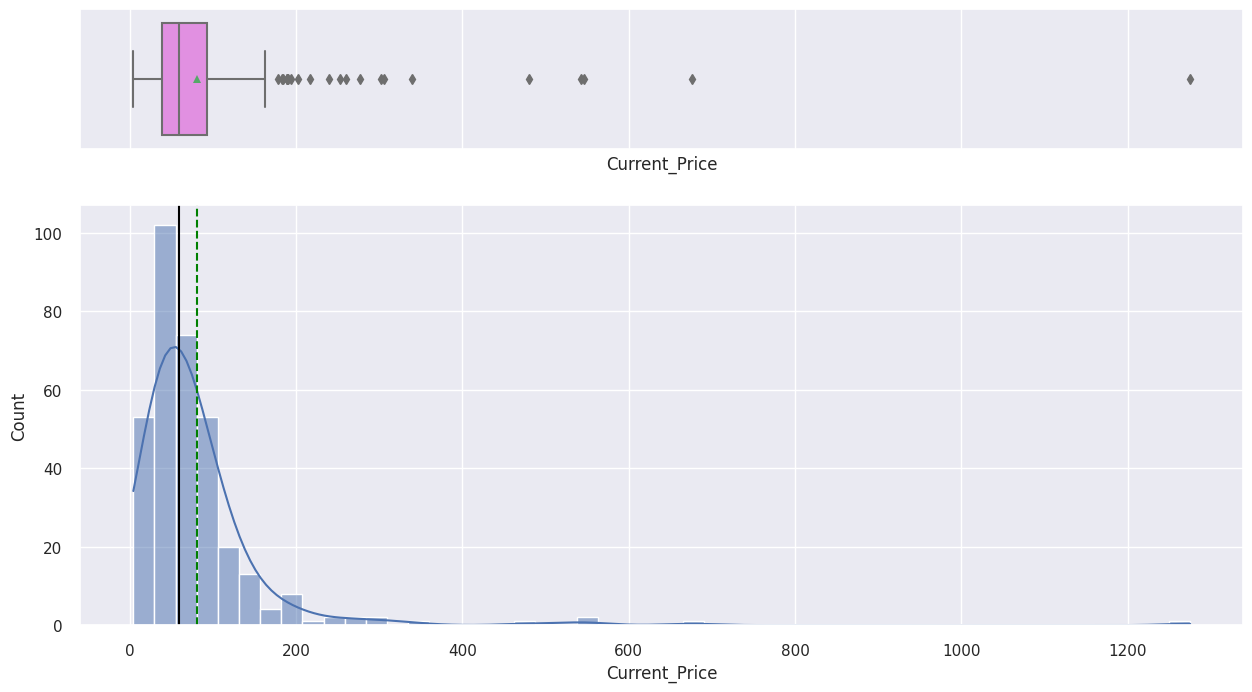

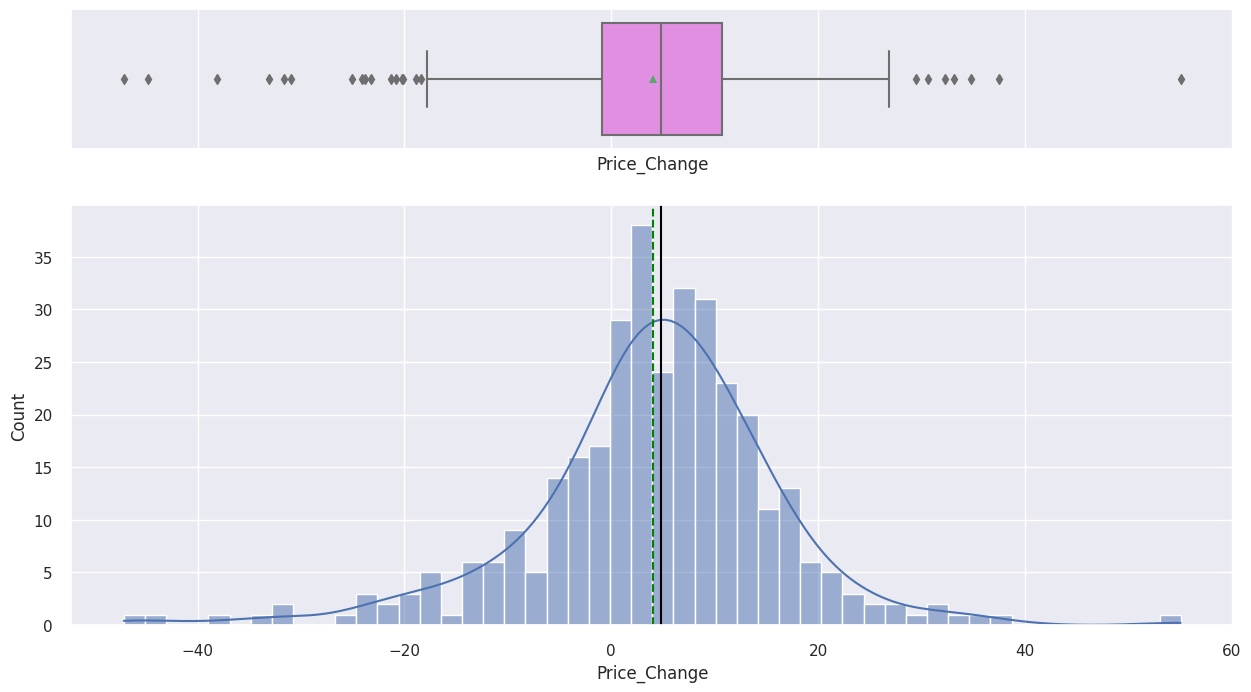

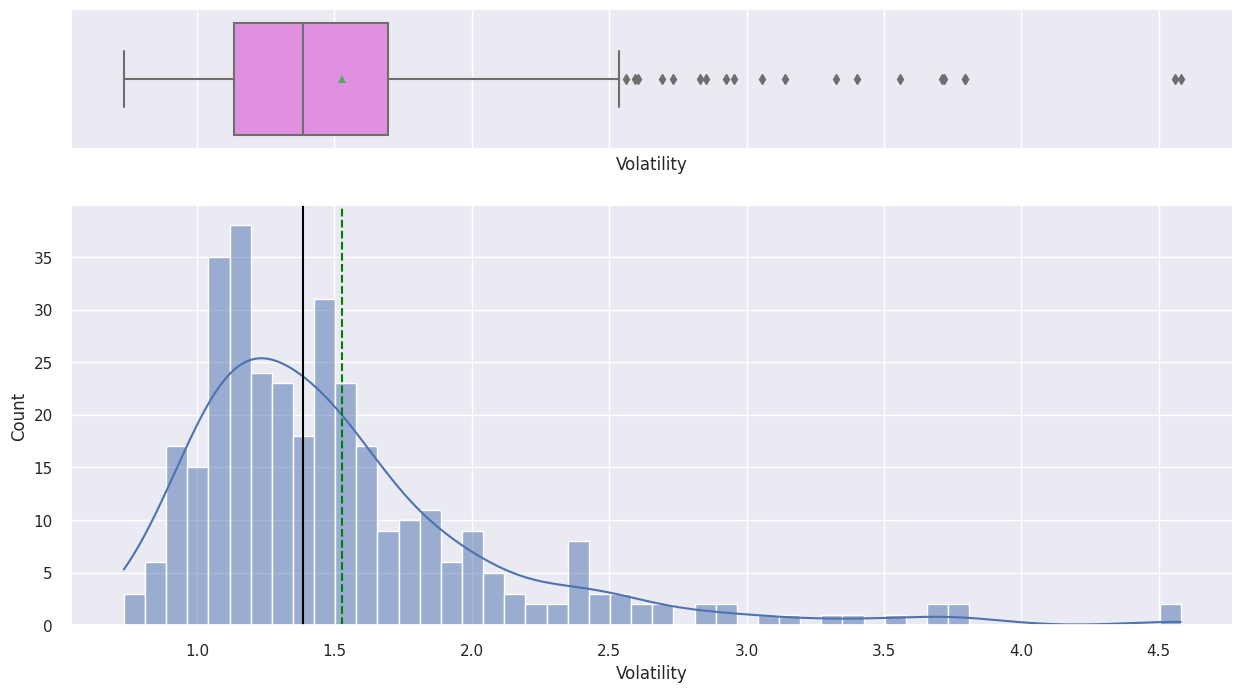

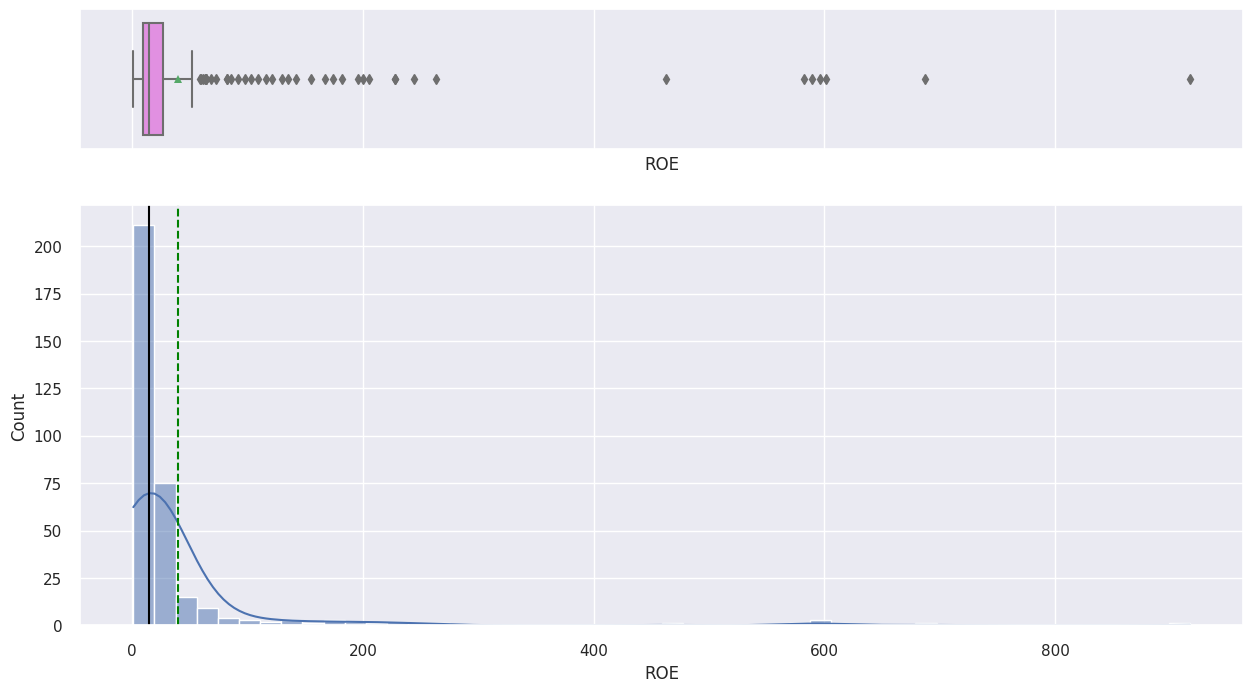

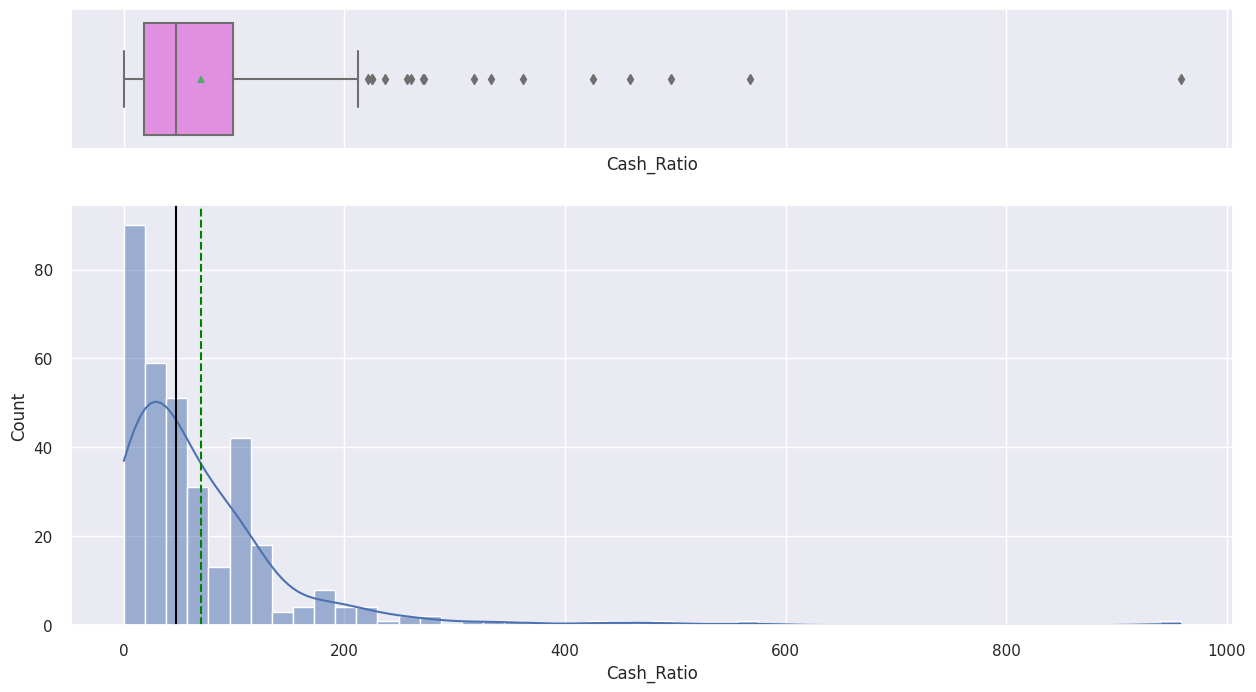

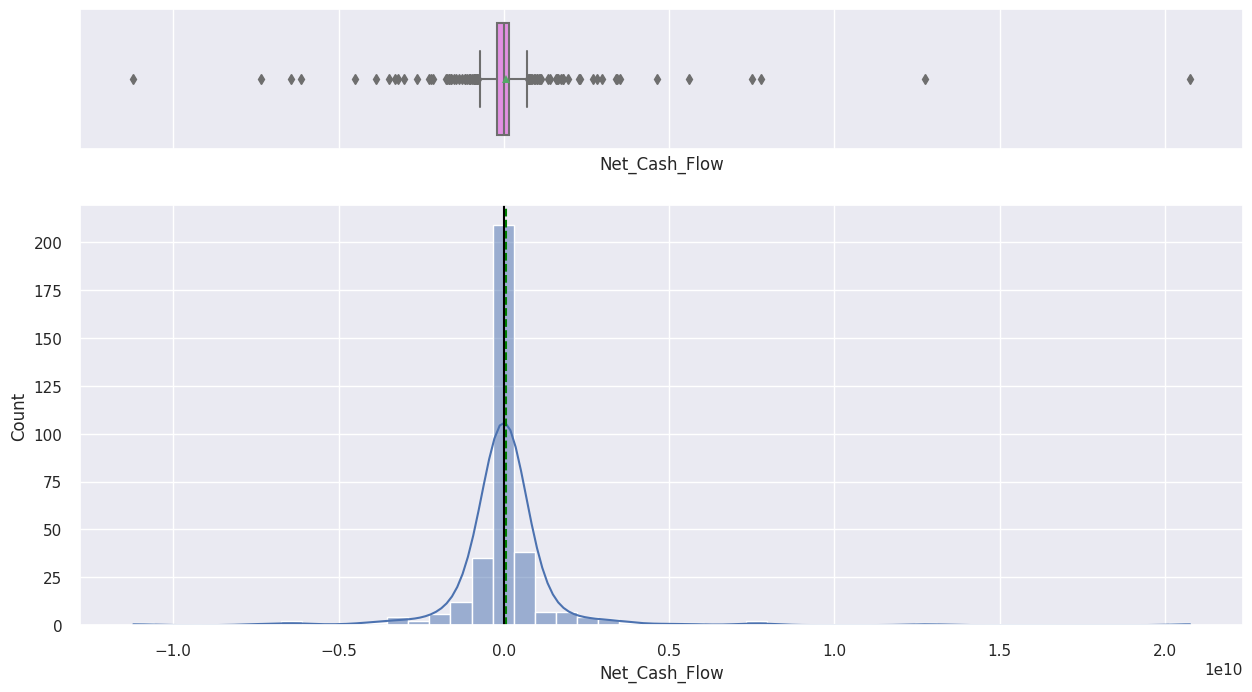

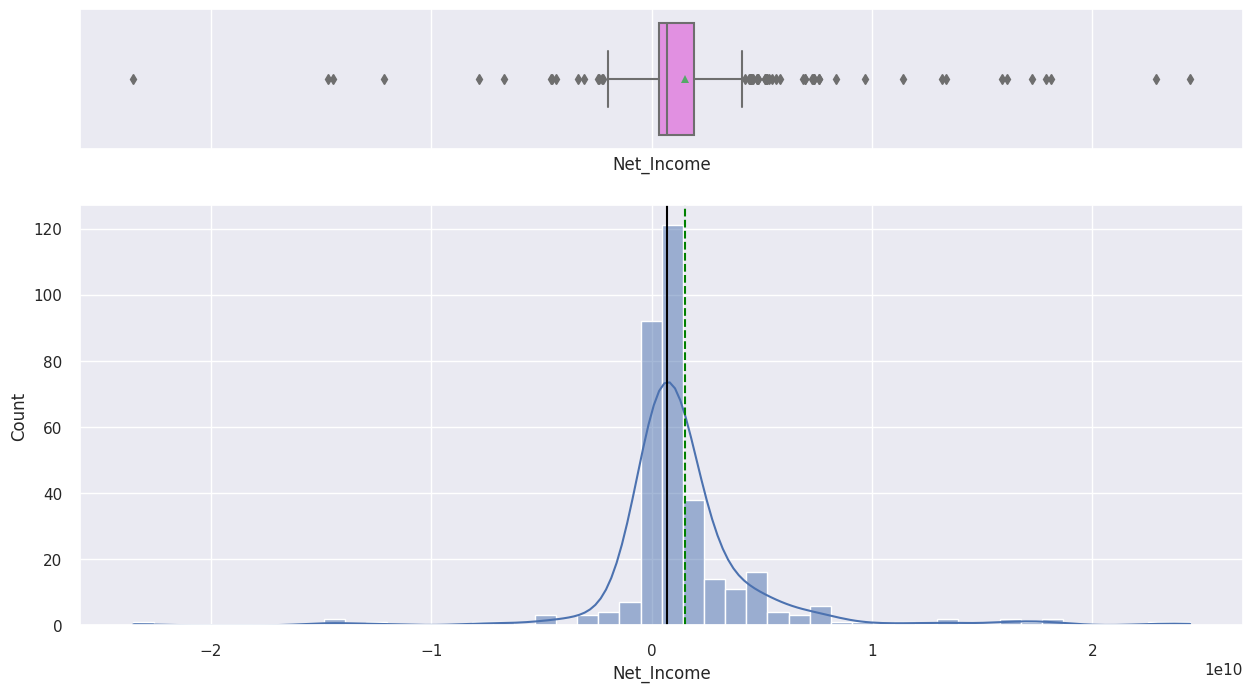

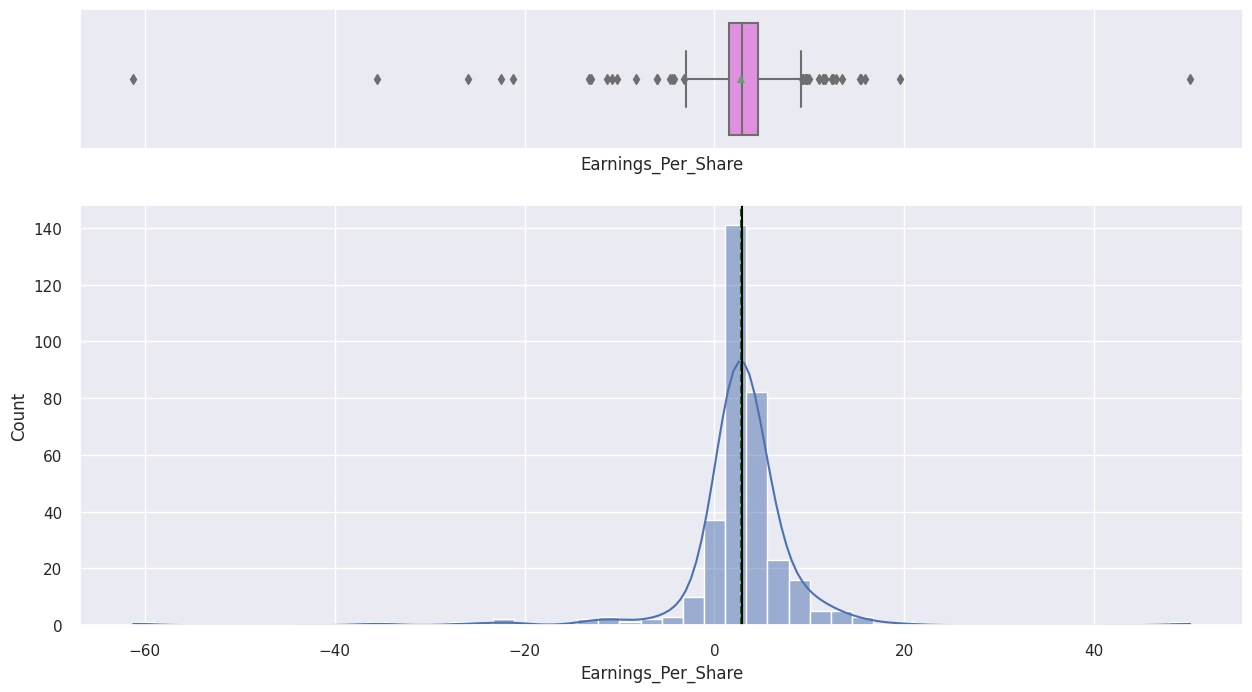

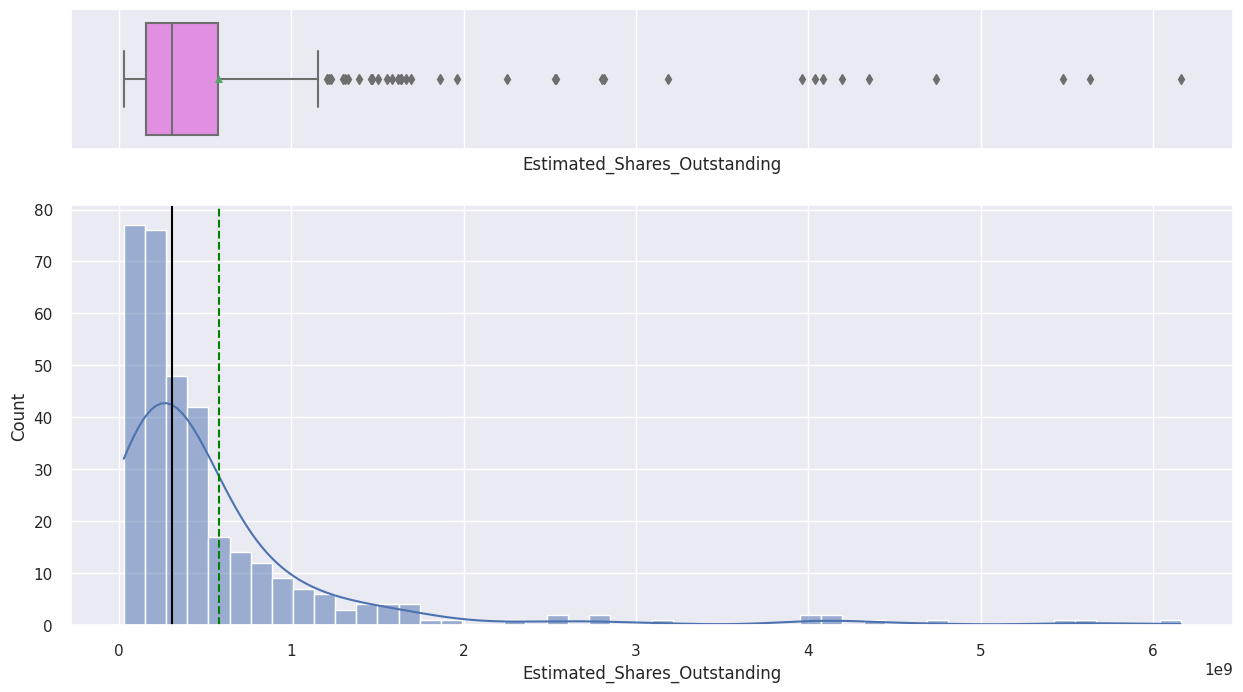

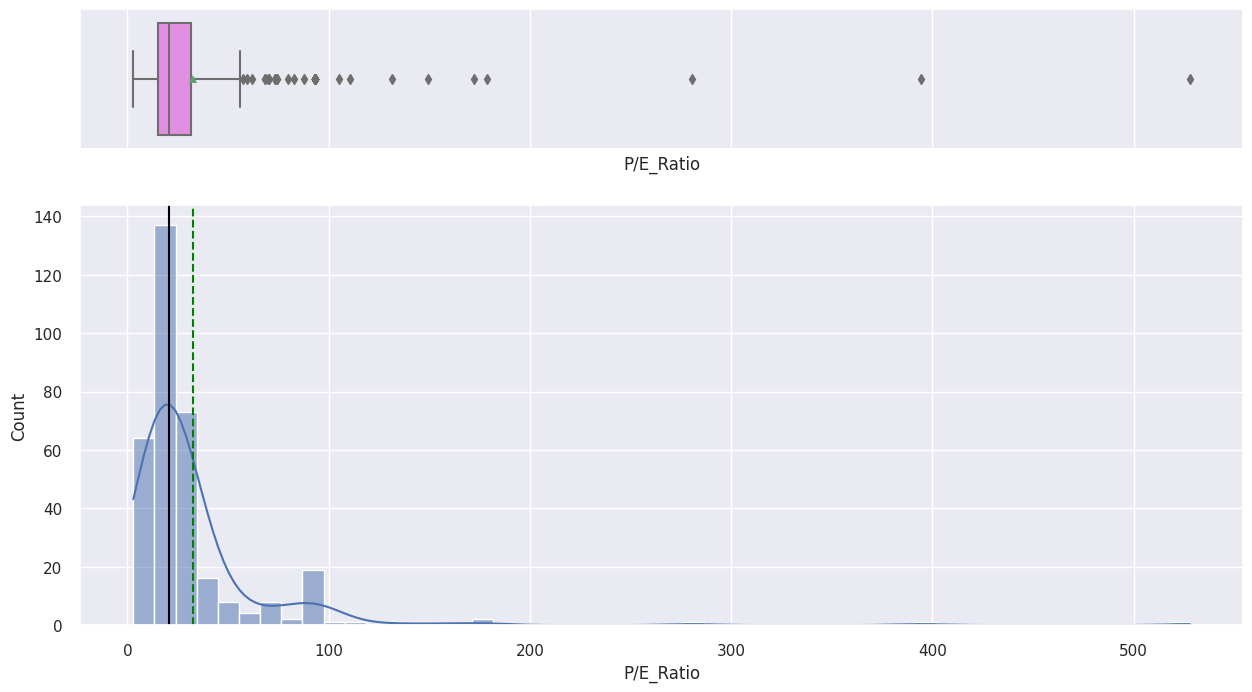

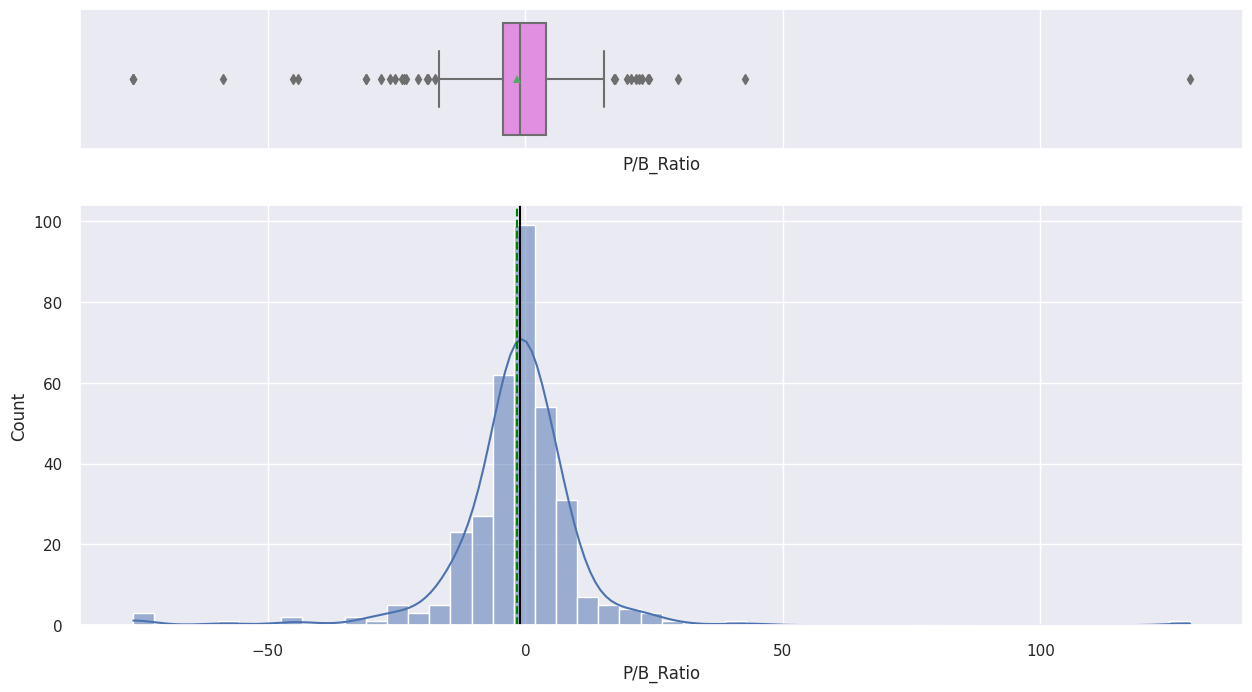

In [29]:
for num in num_cols:

  histogram_boxplot(df, num, bins=50, kde=True, figsize=(15, 8));

plt.show();

The stock price is significantly skewed to the right with a long tail indicating the presence of outliers.

The prices typically range between zero and 150 but goes higher that 1200.
The median is about a 50 and the average price is about 80, all in dollars

In [30]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

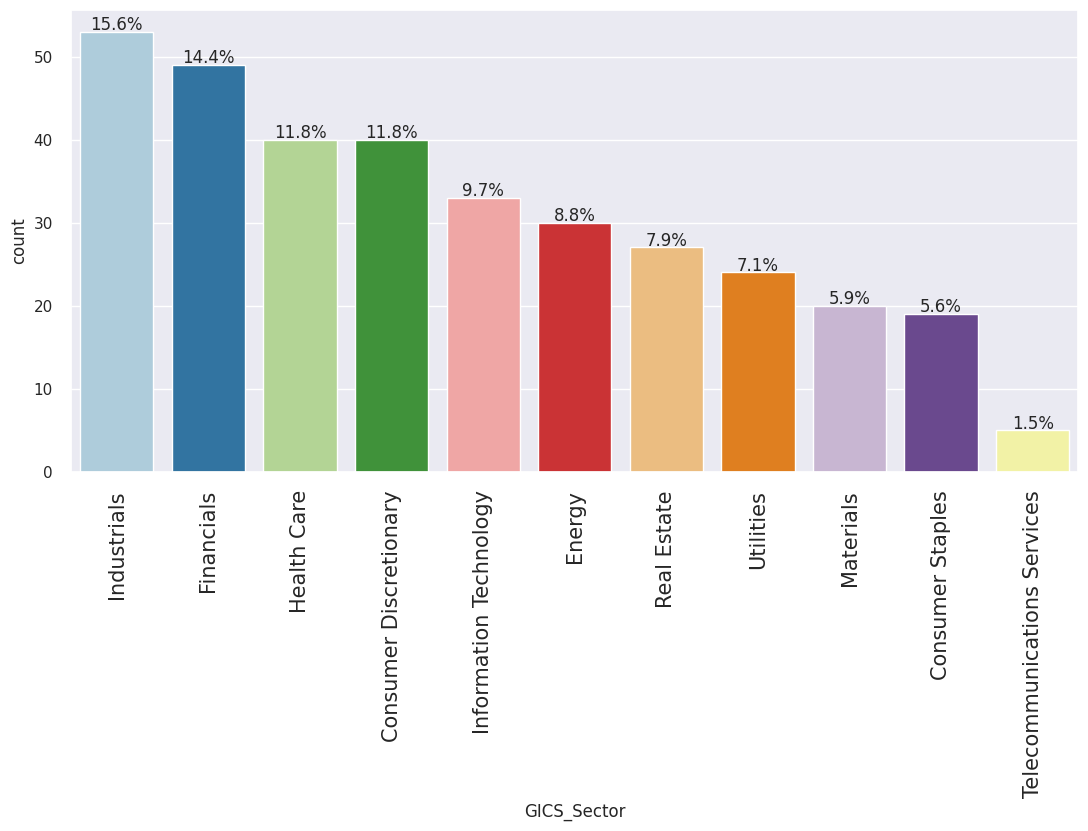

In [31]:
labeled_barplot(df, 'GICS_Sector', perc=True)

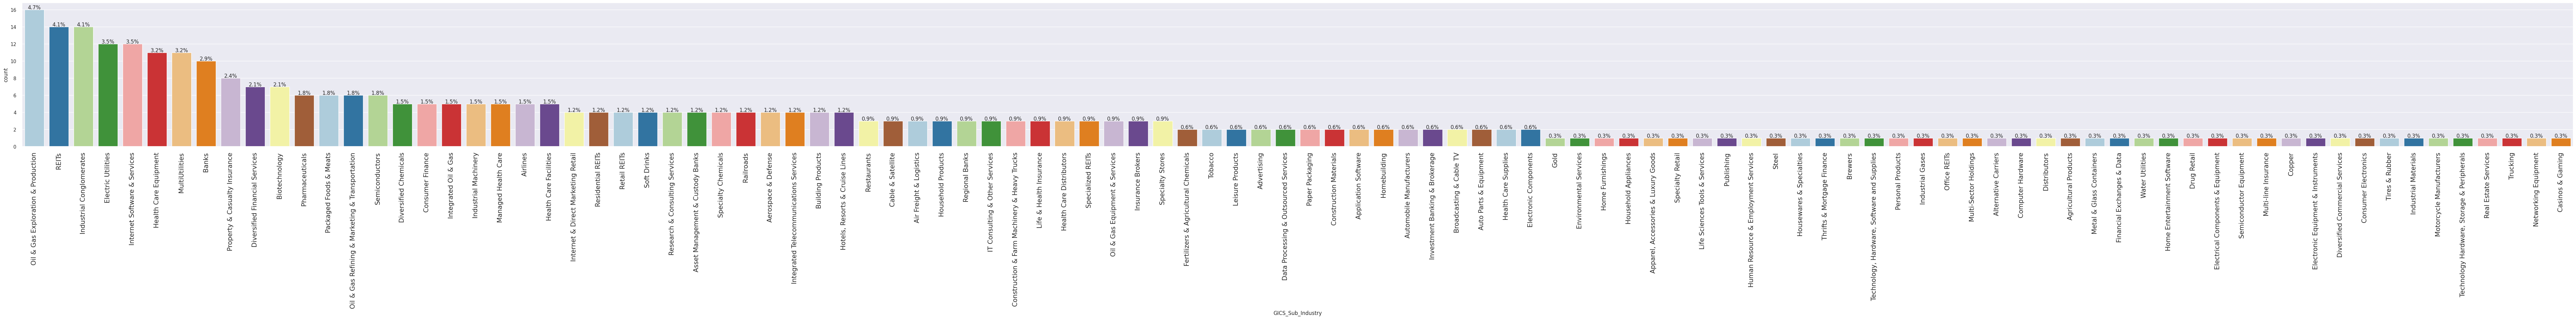

In [44]:
labeled_barplot(df, 'GICS_Sub_Industry', perc=True)

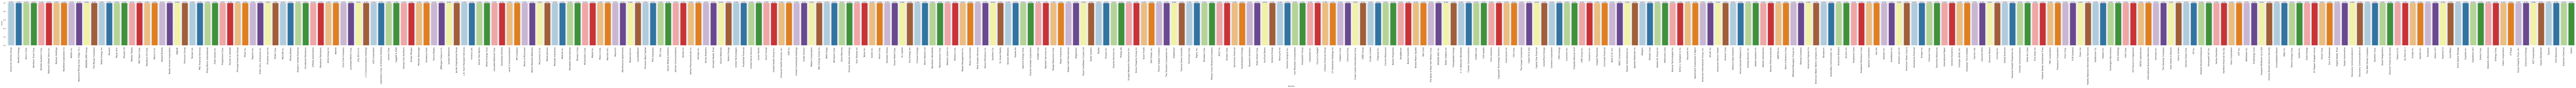

In [45]:
labeled_barplot(df, 'Security', perc=True)

In [43]:
# Grouping by sector and calculate maximum price increase on average

avg_max_price_inc = df.groupby('GICS_Sector')['Price_Change'].mean().reset_index()
avg_max_price_inc

GICS_Sector  Price_Change
0        Consumer Discretionary      5.846093
1              Consumer Staples      8.684750
2                        Energy    -10.228289
3                    Financials      3.865406
4                   Health Care      9.585652
5                   Industrials      2.833127
6        Information Technology      7.217476
7                     Materials      5.589738
8                   Real Estate      6.205548
9   Telecommunications Services      6.956980
10                    Utilities      0.803657

The sectors that had tha maximum average price increase were in Health Care.


In [46]:
pd.crosstab(df.GICS_Sub_Industry, df.GICS_Sector).style.highlight_max(
    color="lightgreen", axis=0
)

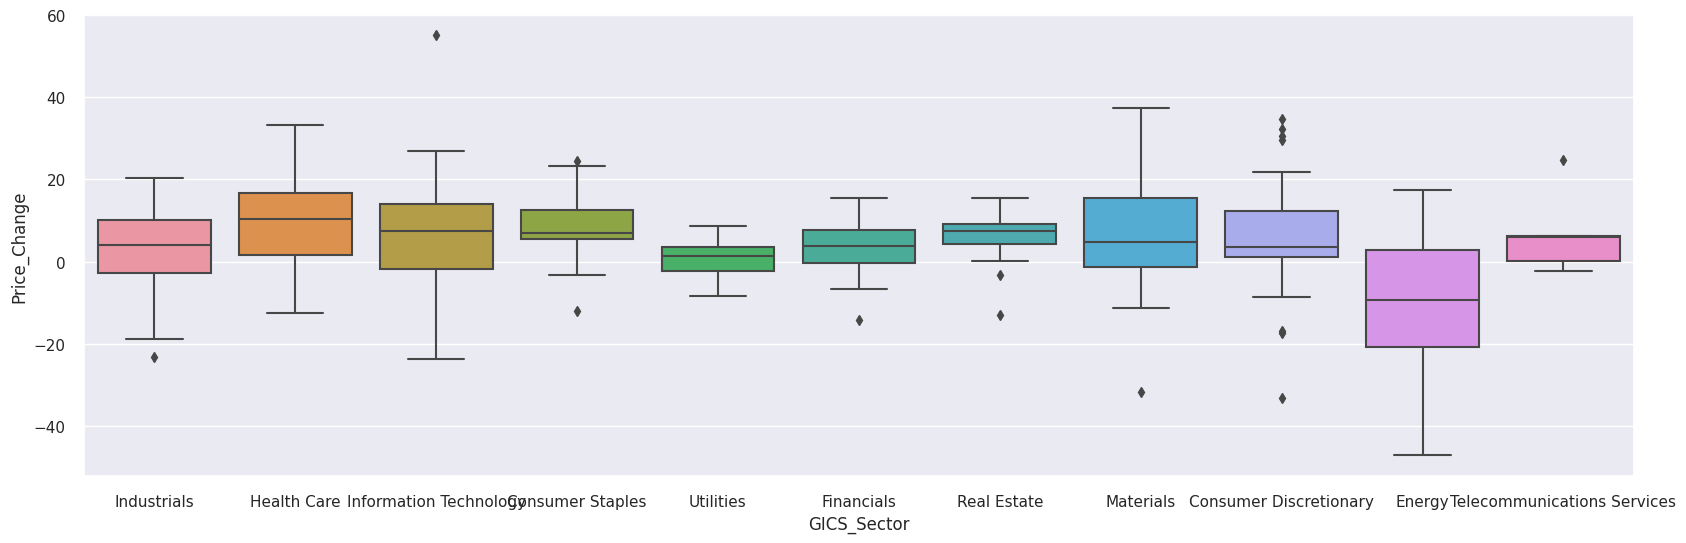

In [47]:
# Bivariate analysis
# Stock Price_Change Vs. GICS_Sector

plt.figure(figsize=(20,6))
sns.boxplot(data = df, y = "Price_Change", x = "GICS_Sector");

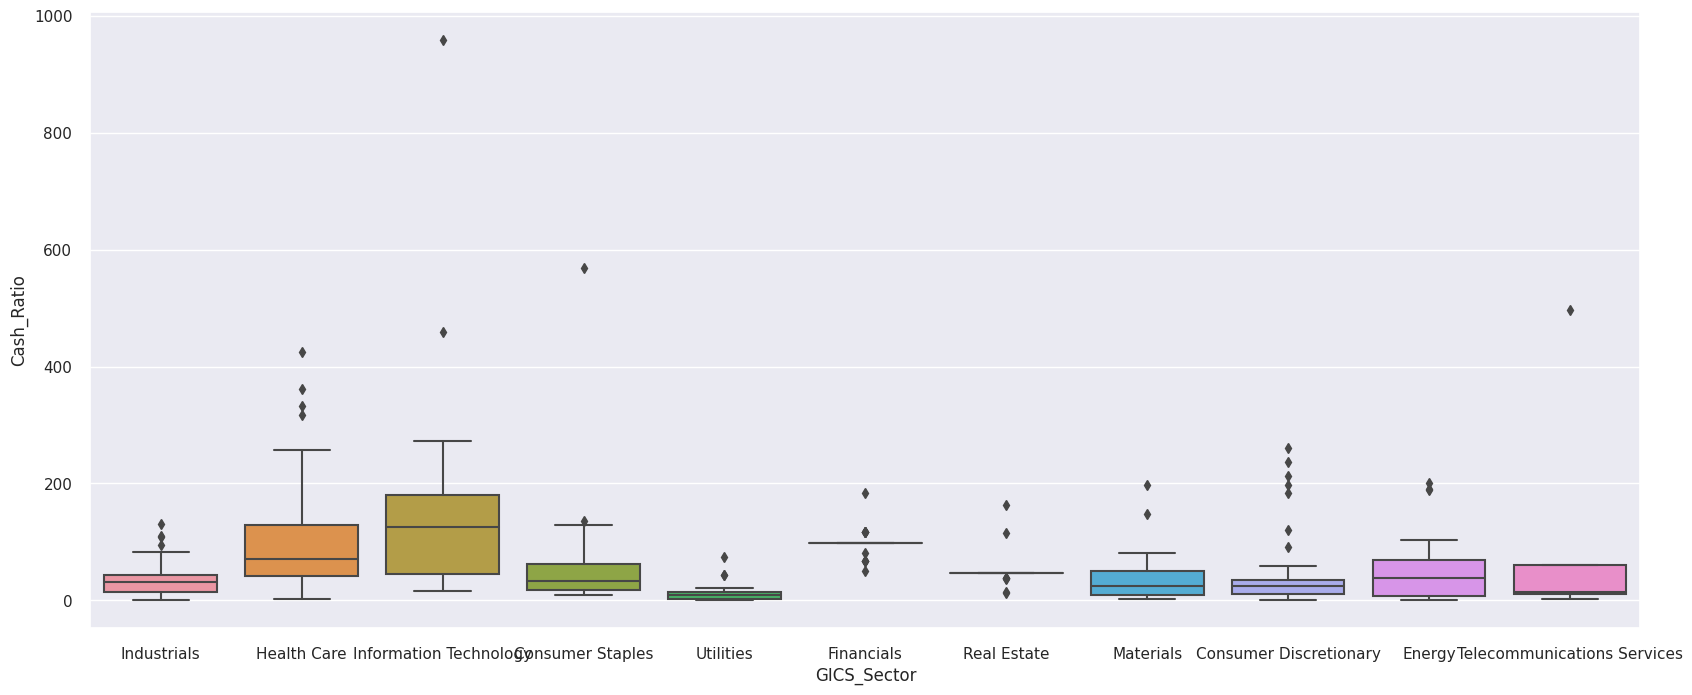

In [48]:
# Cash_Ratio Vs. GICS_Sector

plt.figure(figsize=(20,8))
sns.boxplot(data = df, y = "Cash_Ratio", x = "GICS_Sector");

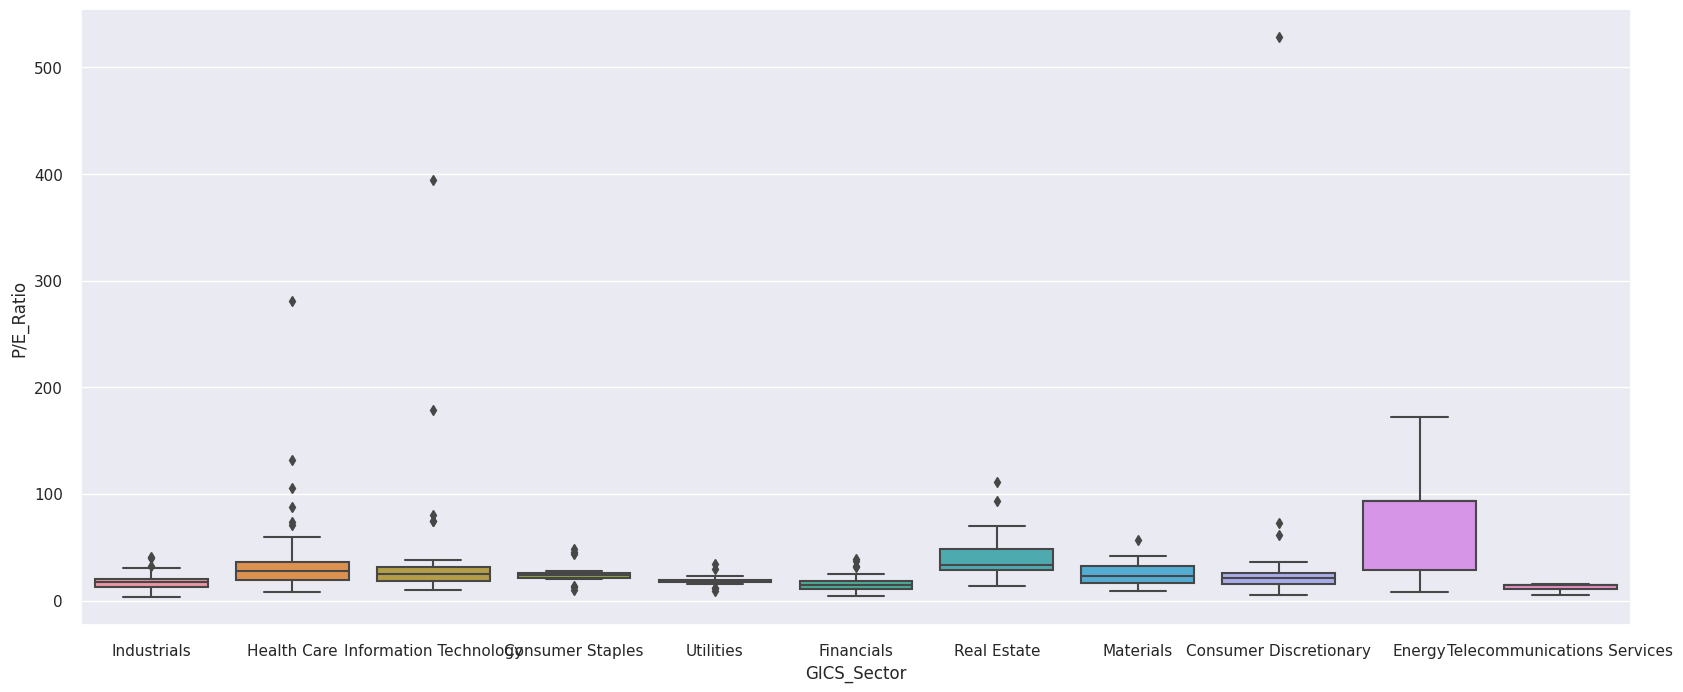

In [49]:
# P/E_Ratio Vs. GICS_Sector

plt.figure(figsize=(20,8))
sns.boxplot(data = df, y = "P/E_Ratio", x = "GICS_Sector");

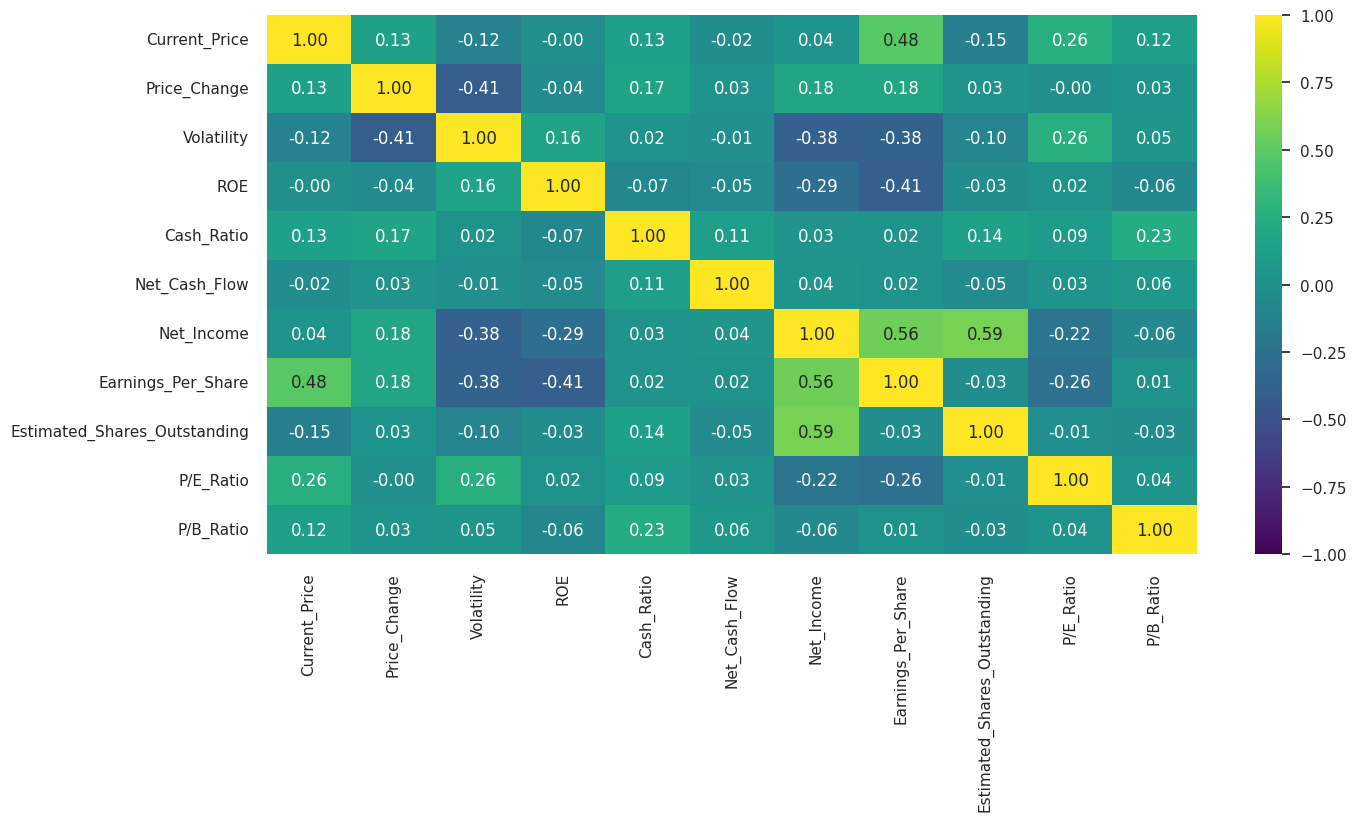

In [51]:
# check for correlations

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="viridis"
)
plt.show()

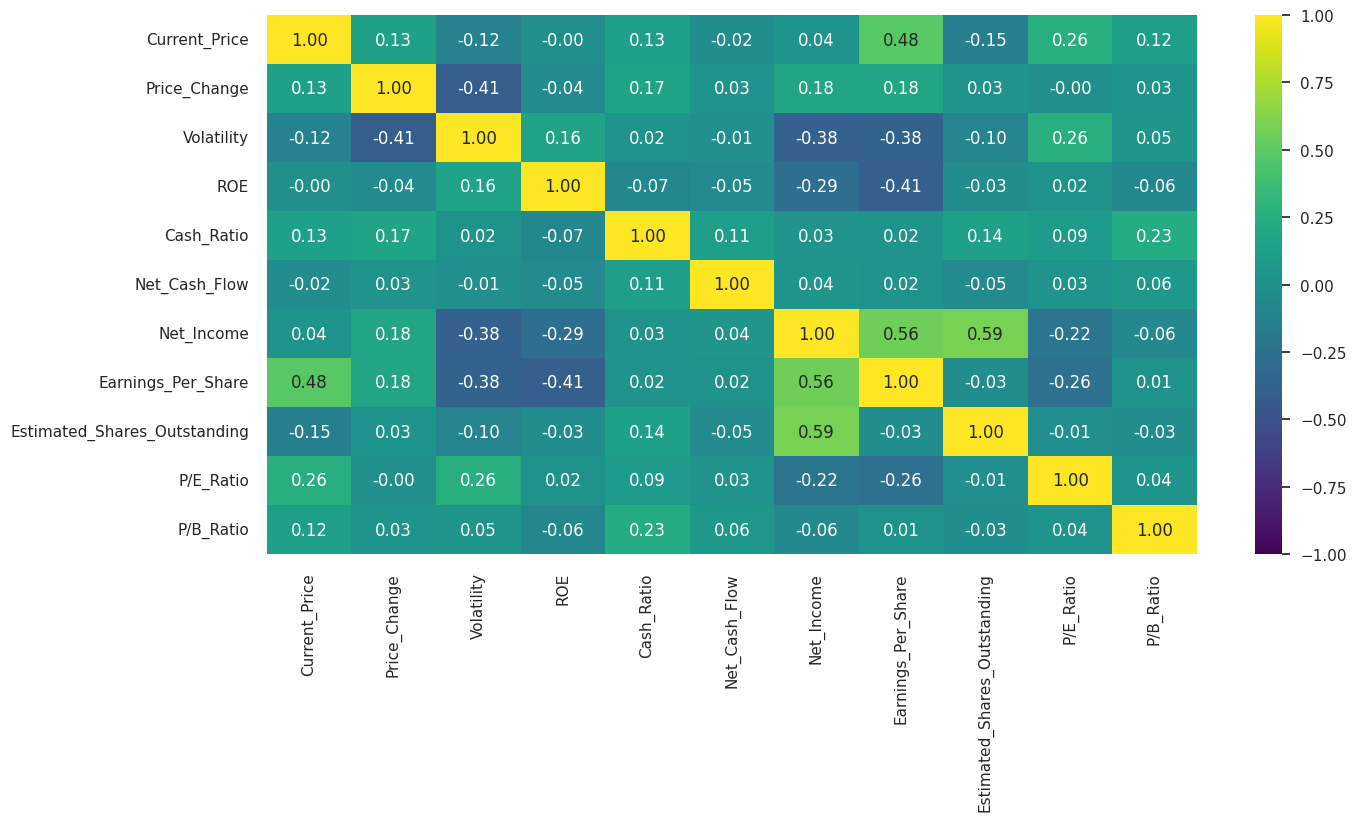

In [53]:
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="viridis")
plt.show()

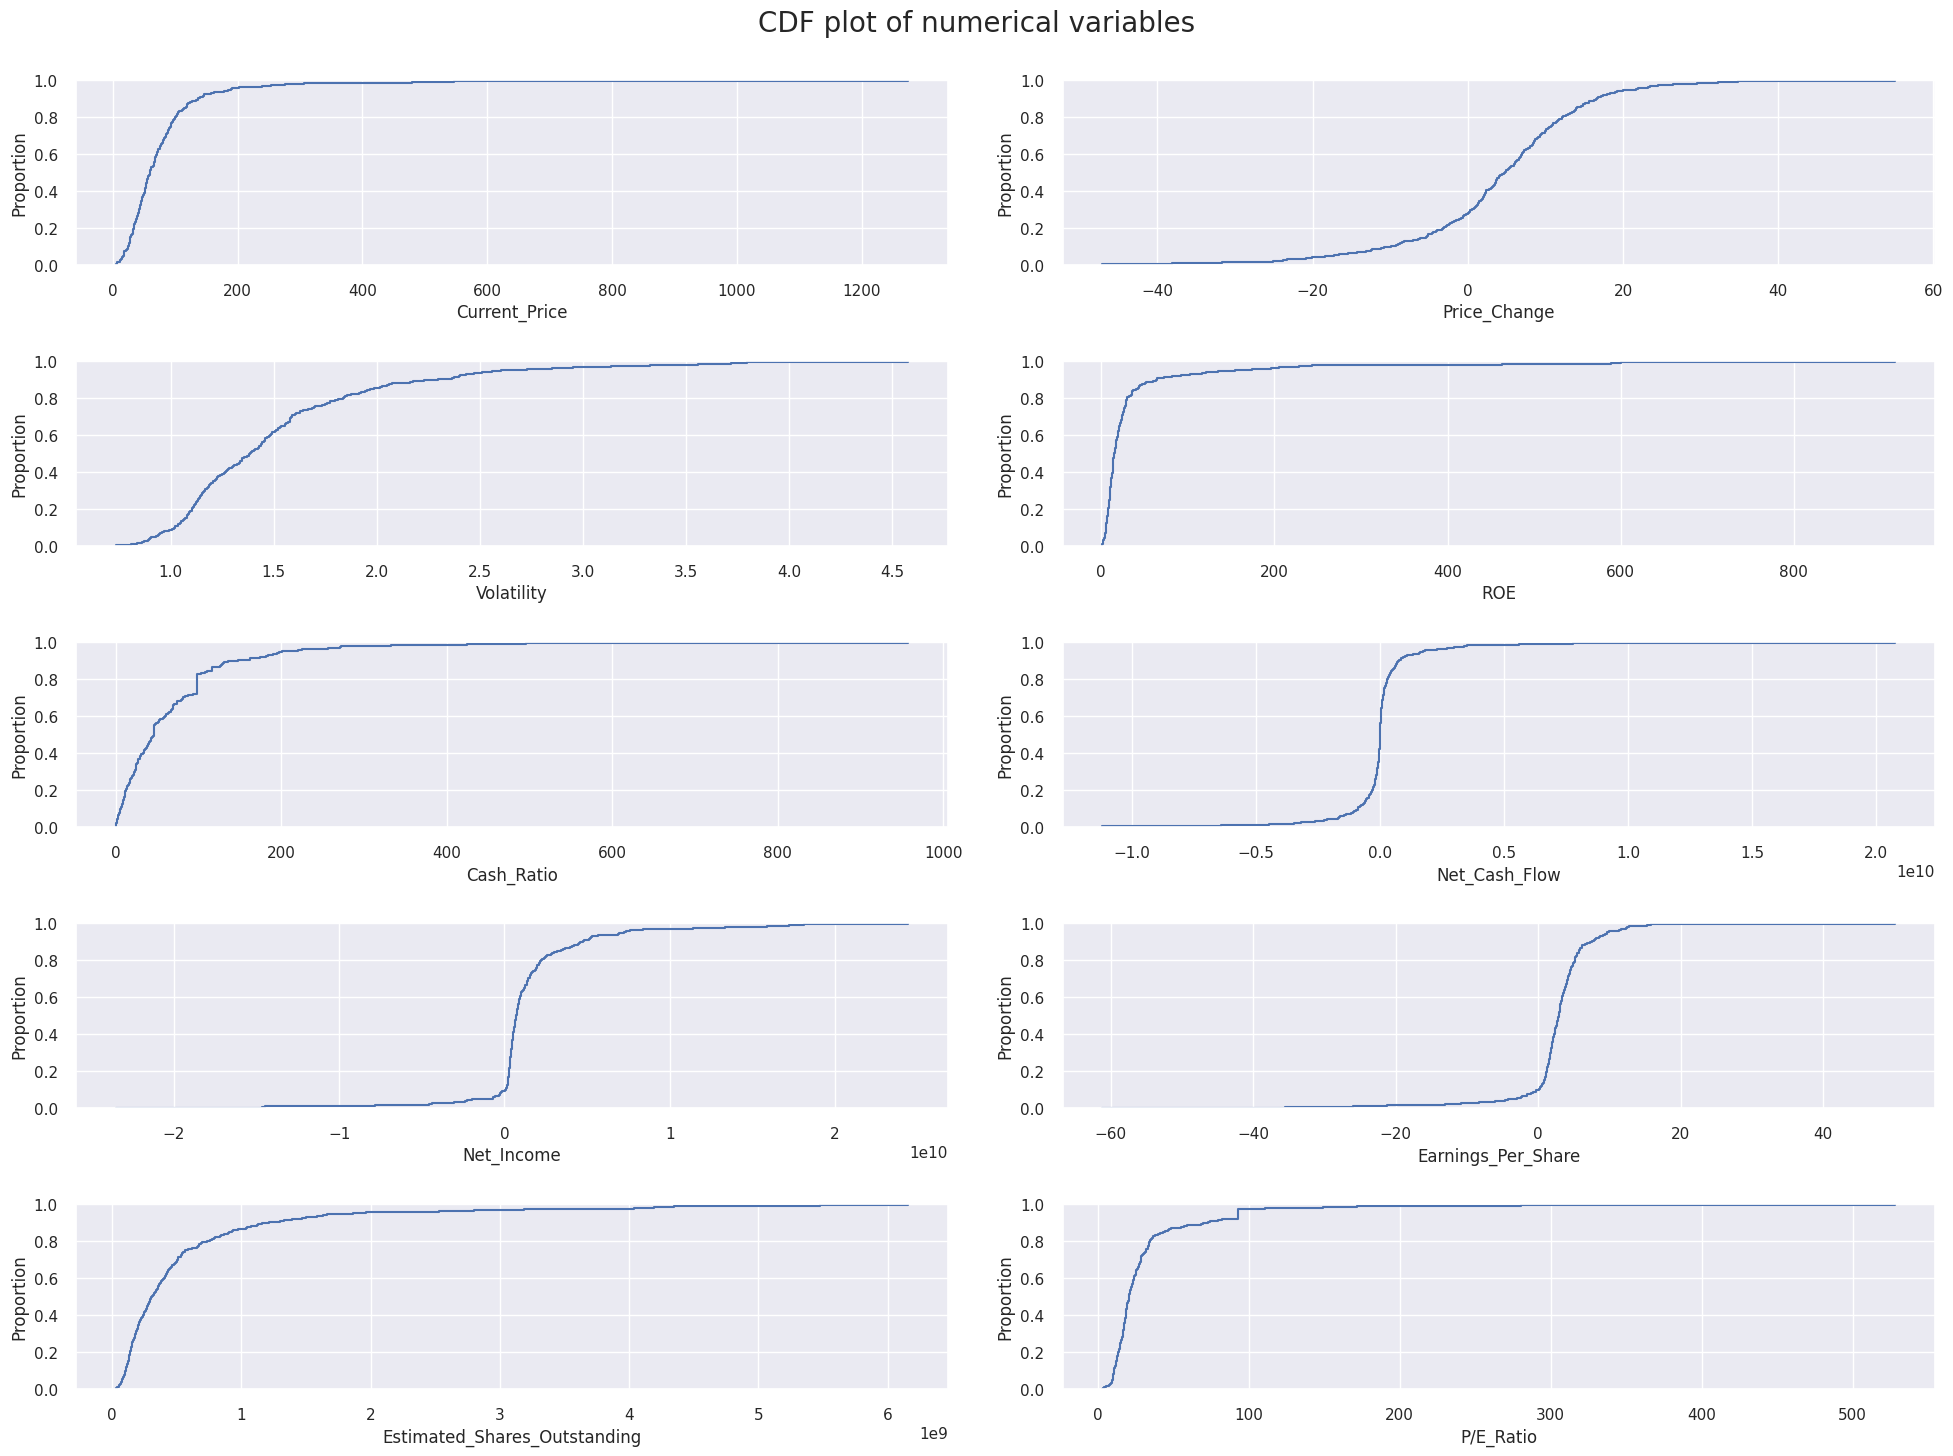

In [68]:
fig, axes = plt.subplots(5, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(5):
    sns.ecdfplot(ax=axes[ii][0], x=df[num_cols[counter]])
    counter = counter + 1
    if counter != 11:
        sns.ecdfplot(ax=axes[ii][1], x=df[num_cols[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

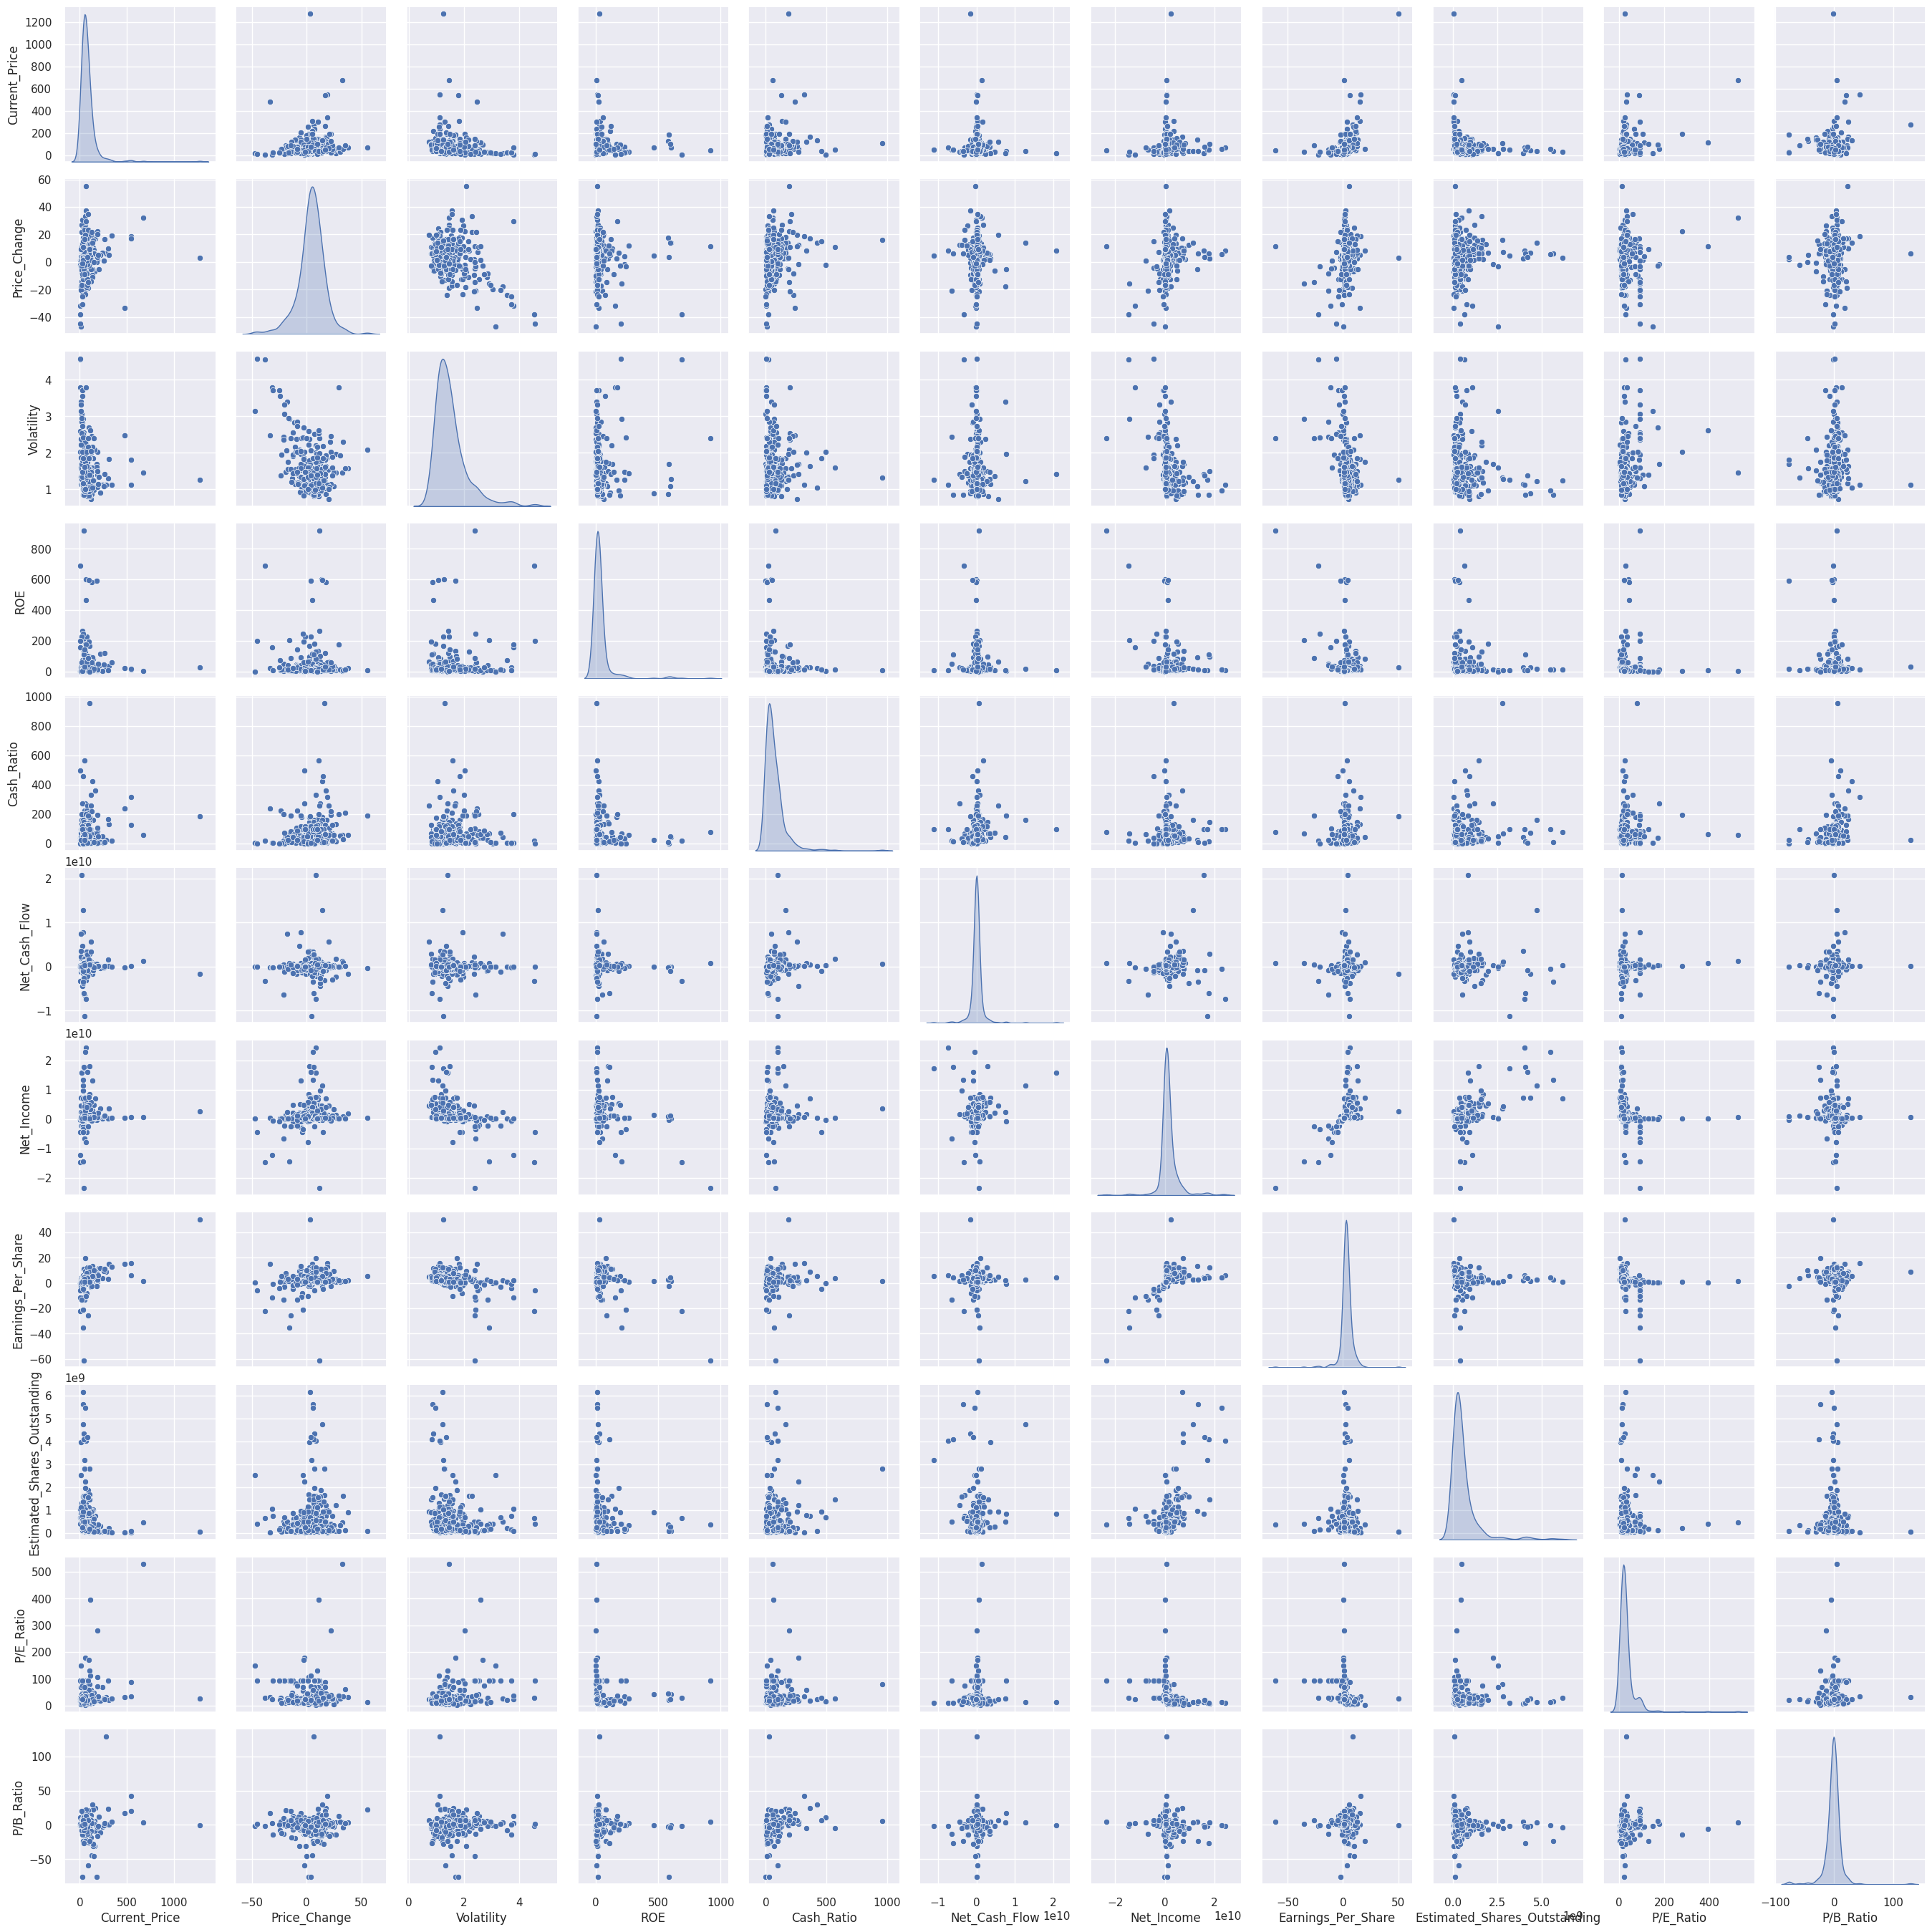

In [54]:
sns.pairplot(data=df[num_cols], diag_kind="kde")
plt.show()

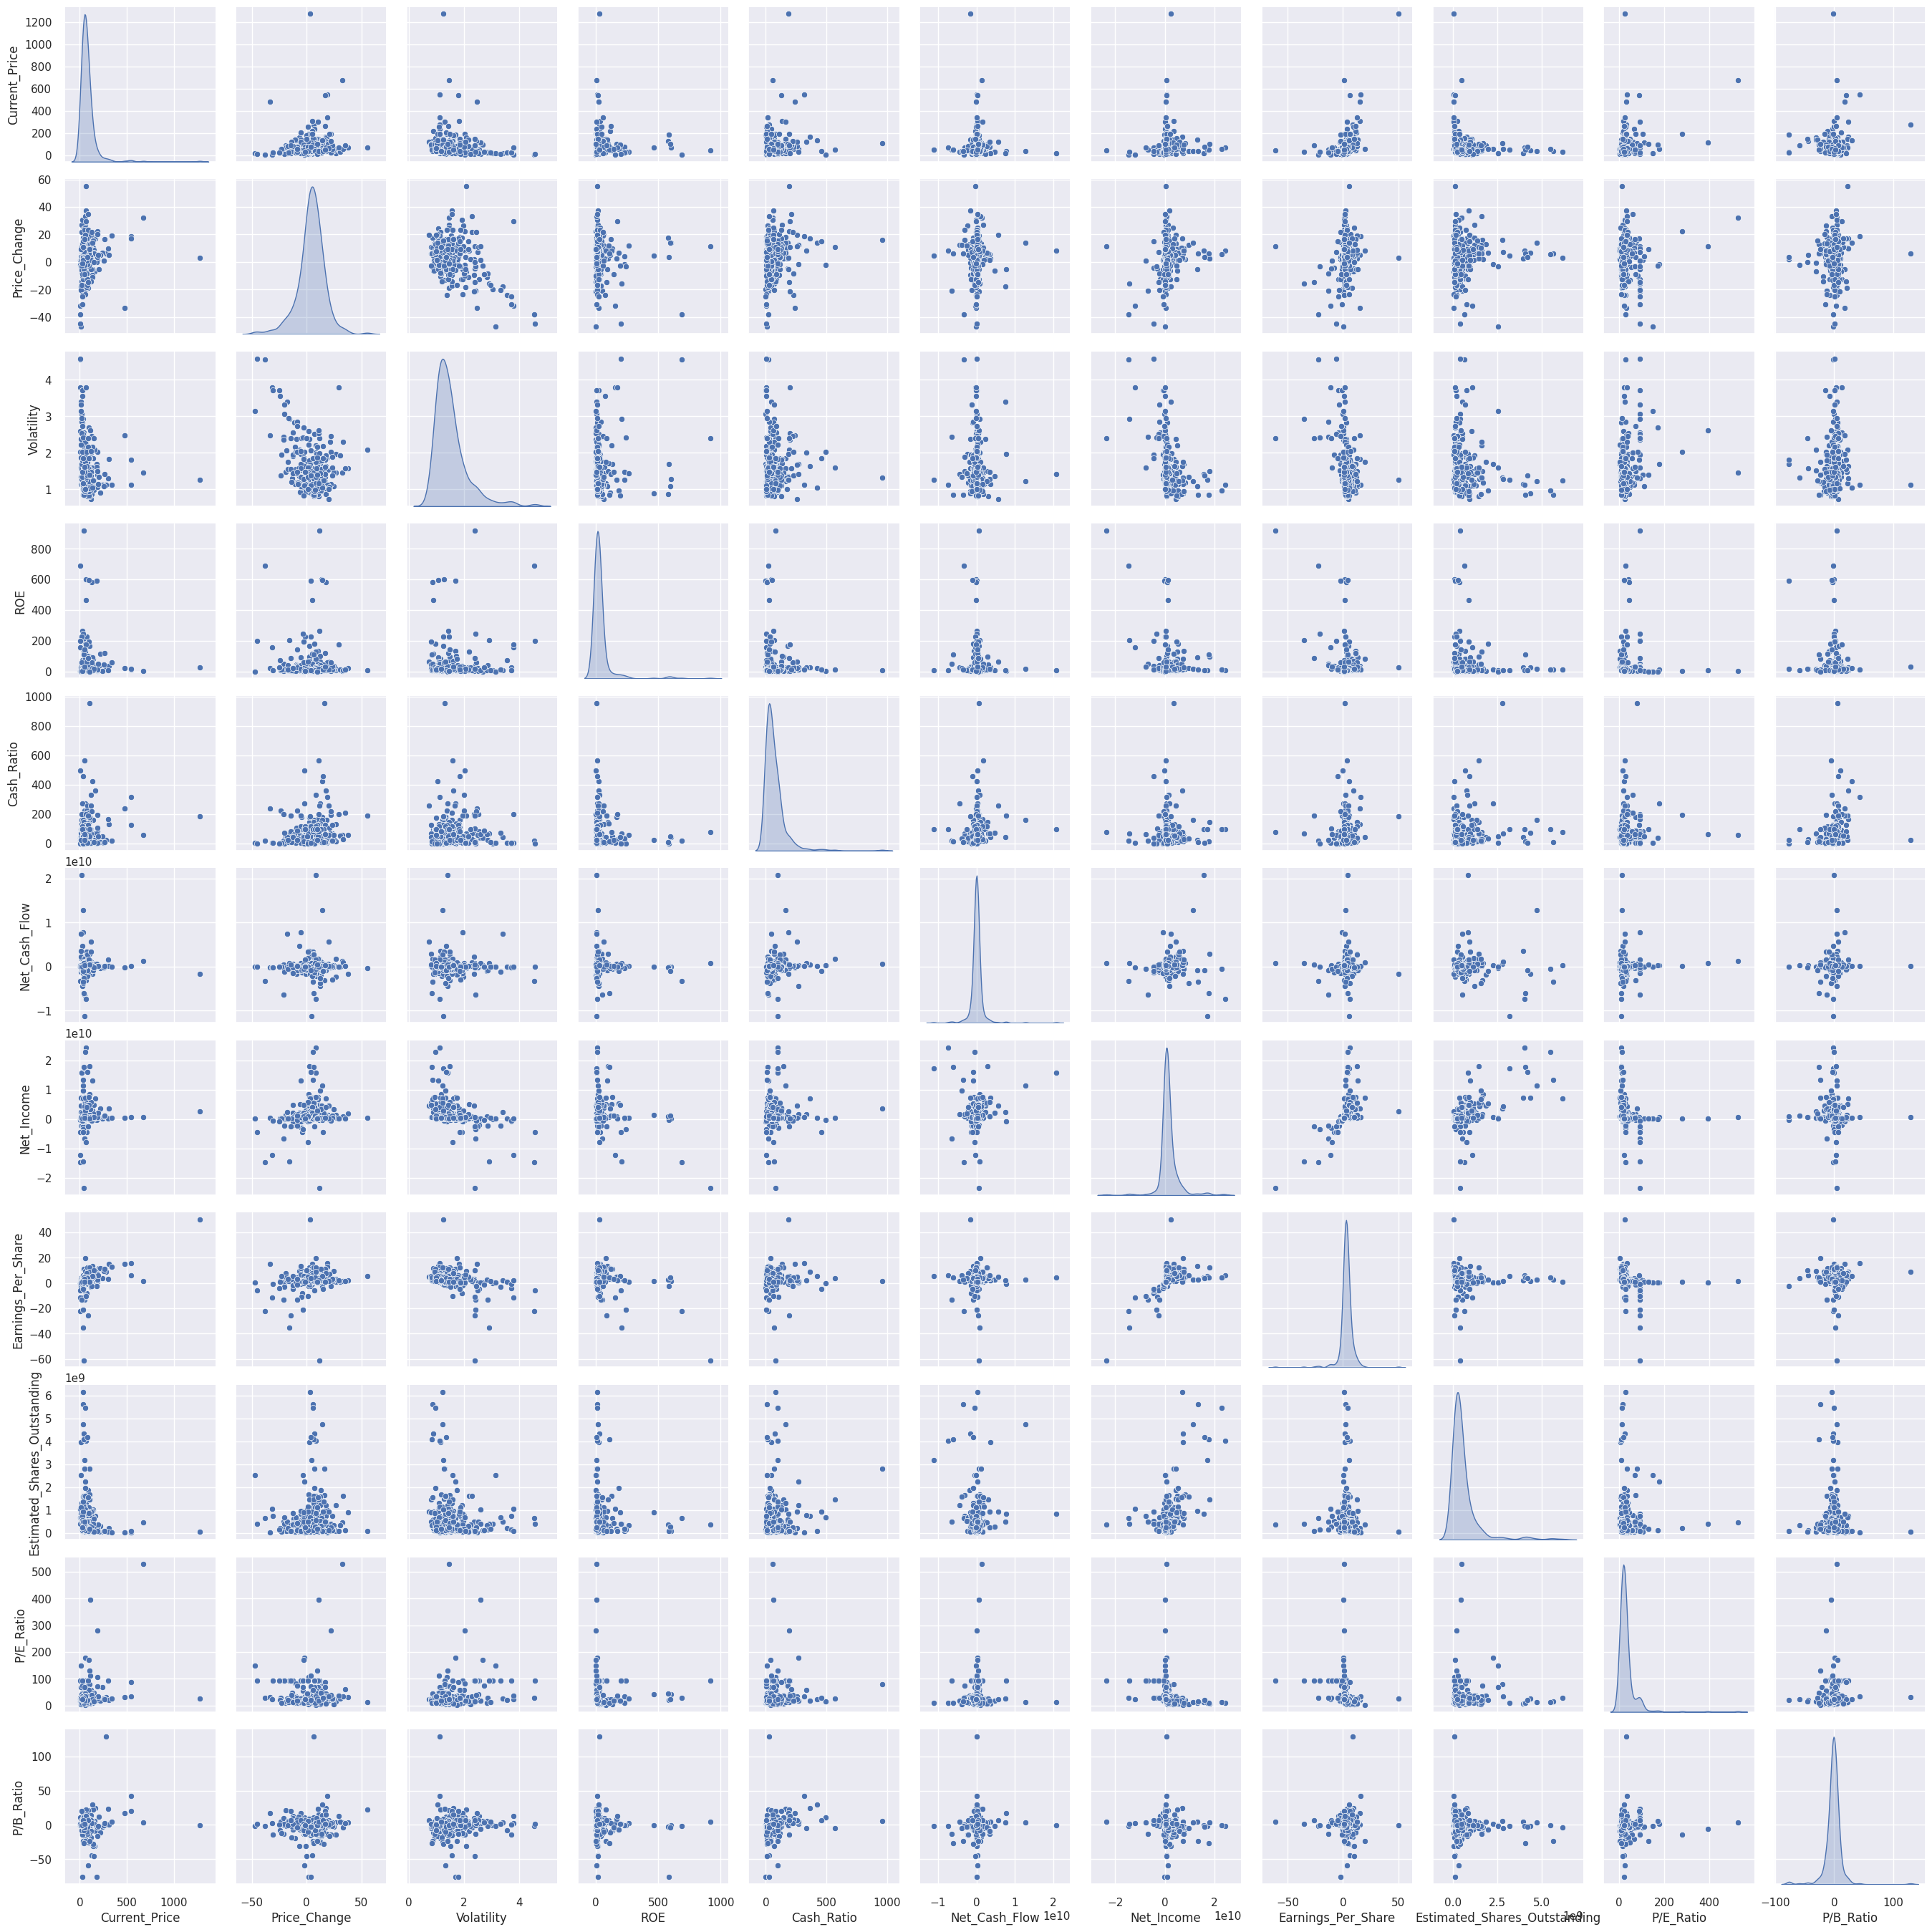

In [55]:
# Pair-plot analysis

sns.pairplot(df[num_cols],diag_kind="kde");

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

In [57]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df[num_cols].copy()
subset_scaled = scaler.fit_transform(subset)


In [58]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

In [71]:
subset_scaled_df

Current_Price  Price_Change  Volatility       ROE  Cash_Ratio  \
0        -0.393341      0.493950    0.272749  0.989601   -0.210698   
1        -0.220837      0.355439    1.137045  0.937737    0.077269   
2        -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3         0.133567      0.825696   -0.284802 -0.317379    1.218059   
4        -0.260874     -0.492636    0.296470 -0.265515    2.237018   
..             ...           ...         ...       ...         ...   
335      -0.486181      0.901646    0.540121 -0.255142    4.308162   
336      -0.289510     -1.065766   -0.079703  1.062211   -0.476513   
337       0.221913      0.439539   -0.206067 -0.400362    0.332009   
338      -0.547053     -0.436811   -0.097813 -0.369243    0.320933   
339      -0.336453      1.051046    0.142671 -0.078803   -0.055639   

     Net_Cash_Flow  Net_Income  Earnings_Per_Share  \
0        -0.339355    1.554415            1.309399   
1        -0.002335    0.927628            0.056755   
2         0.454058    0.744371            0.024831   
3        -0.152497   -0.219816           -0.230563   
4         0.133564   -0.202703           -0.374982   
..             ...         ...                 ...   
335      -0.559673   -1.487784           -1.127481   
336       0.053235   -0.051186            0.029391   
337       0.164889   -0.342467           -0.303532   
338      -0.051022   -0.301171           -0.239684   
339       0.111378   -0.293666           -0.318734   

     Estimated_Shares_Outstanding  P/E_Ratio  P/B_Ratio  
0                        0.107863  -0.652487  -0.506653  
1                        1.250274  -0.311769  -0.504205  
2                        1.098021  -0.391502   0.094941  
3                       -0.091622   0.947148   0.424333  
4                        1.978399   3.293307   0.199196  
..                            ...        ...        ...  
335                      0.429111  -0.082116   0.572194  
336                     -0.167741  -0.337154  -0.152012  
337                     -0.460058   2.233634  -1.589390  
338                     -0.377852  -0.222714   0.118680  
339                     -0.092942   0.854902   0.246754  

[340 rows x 11 columns]

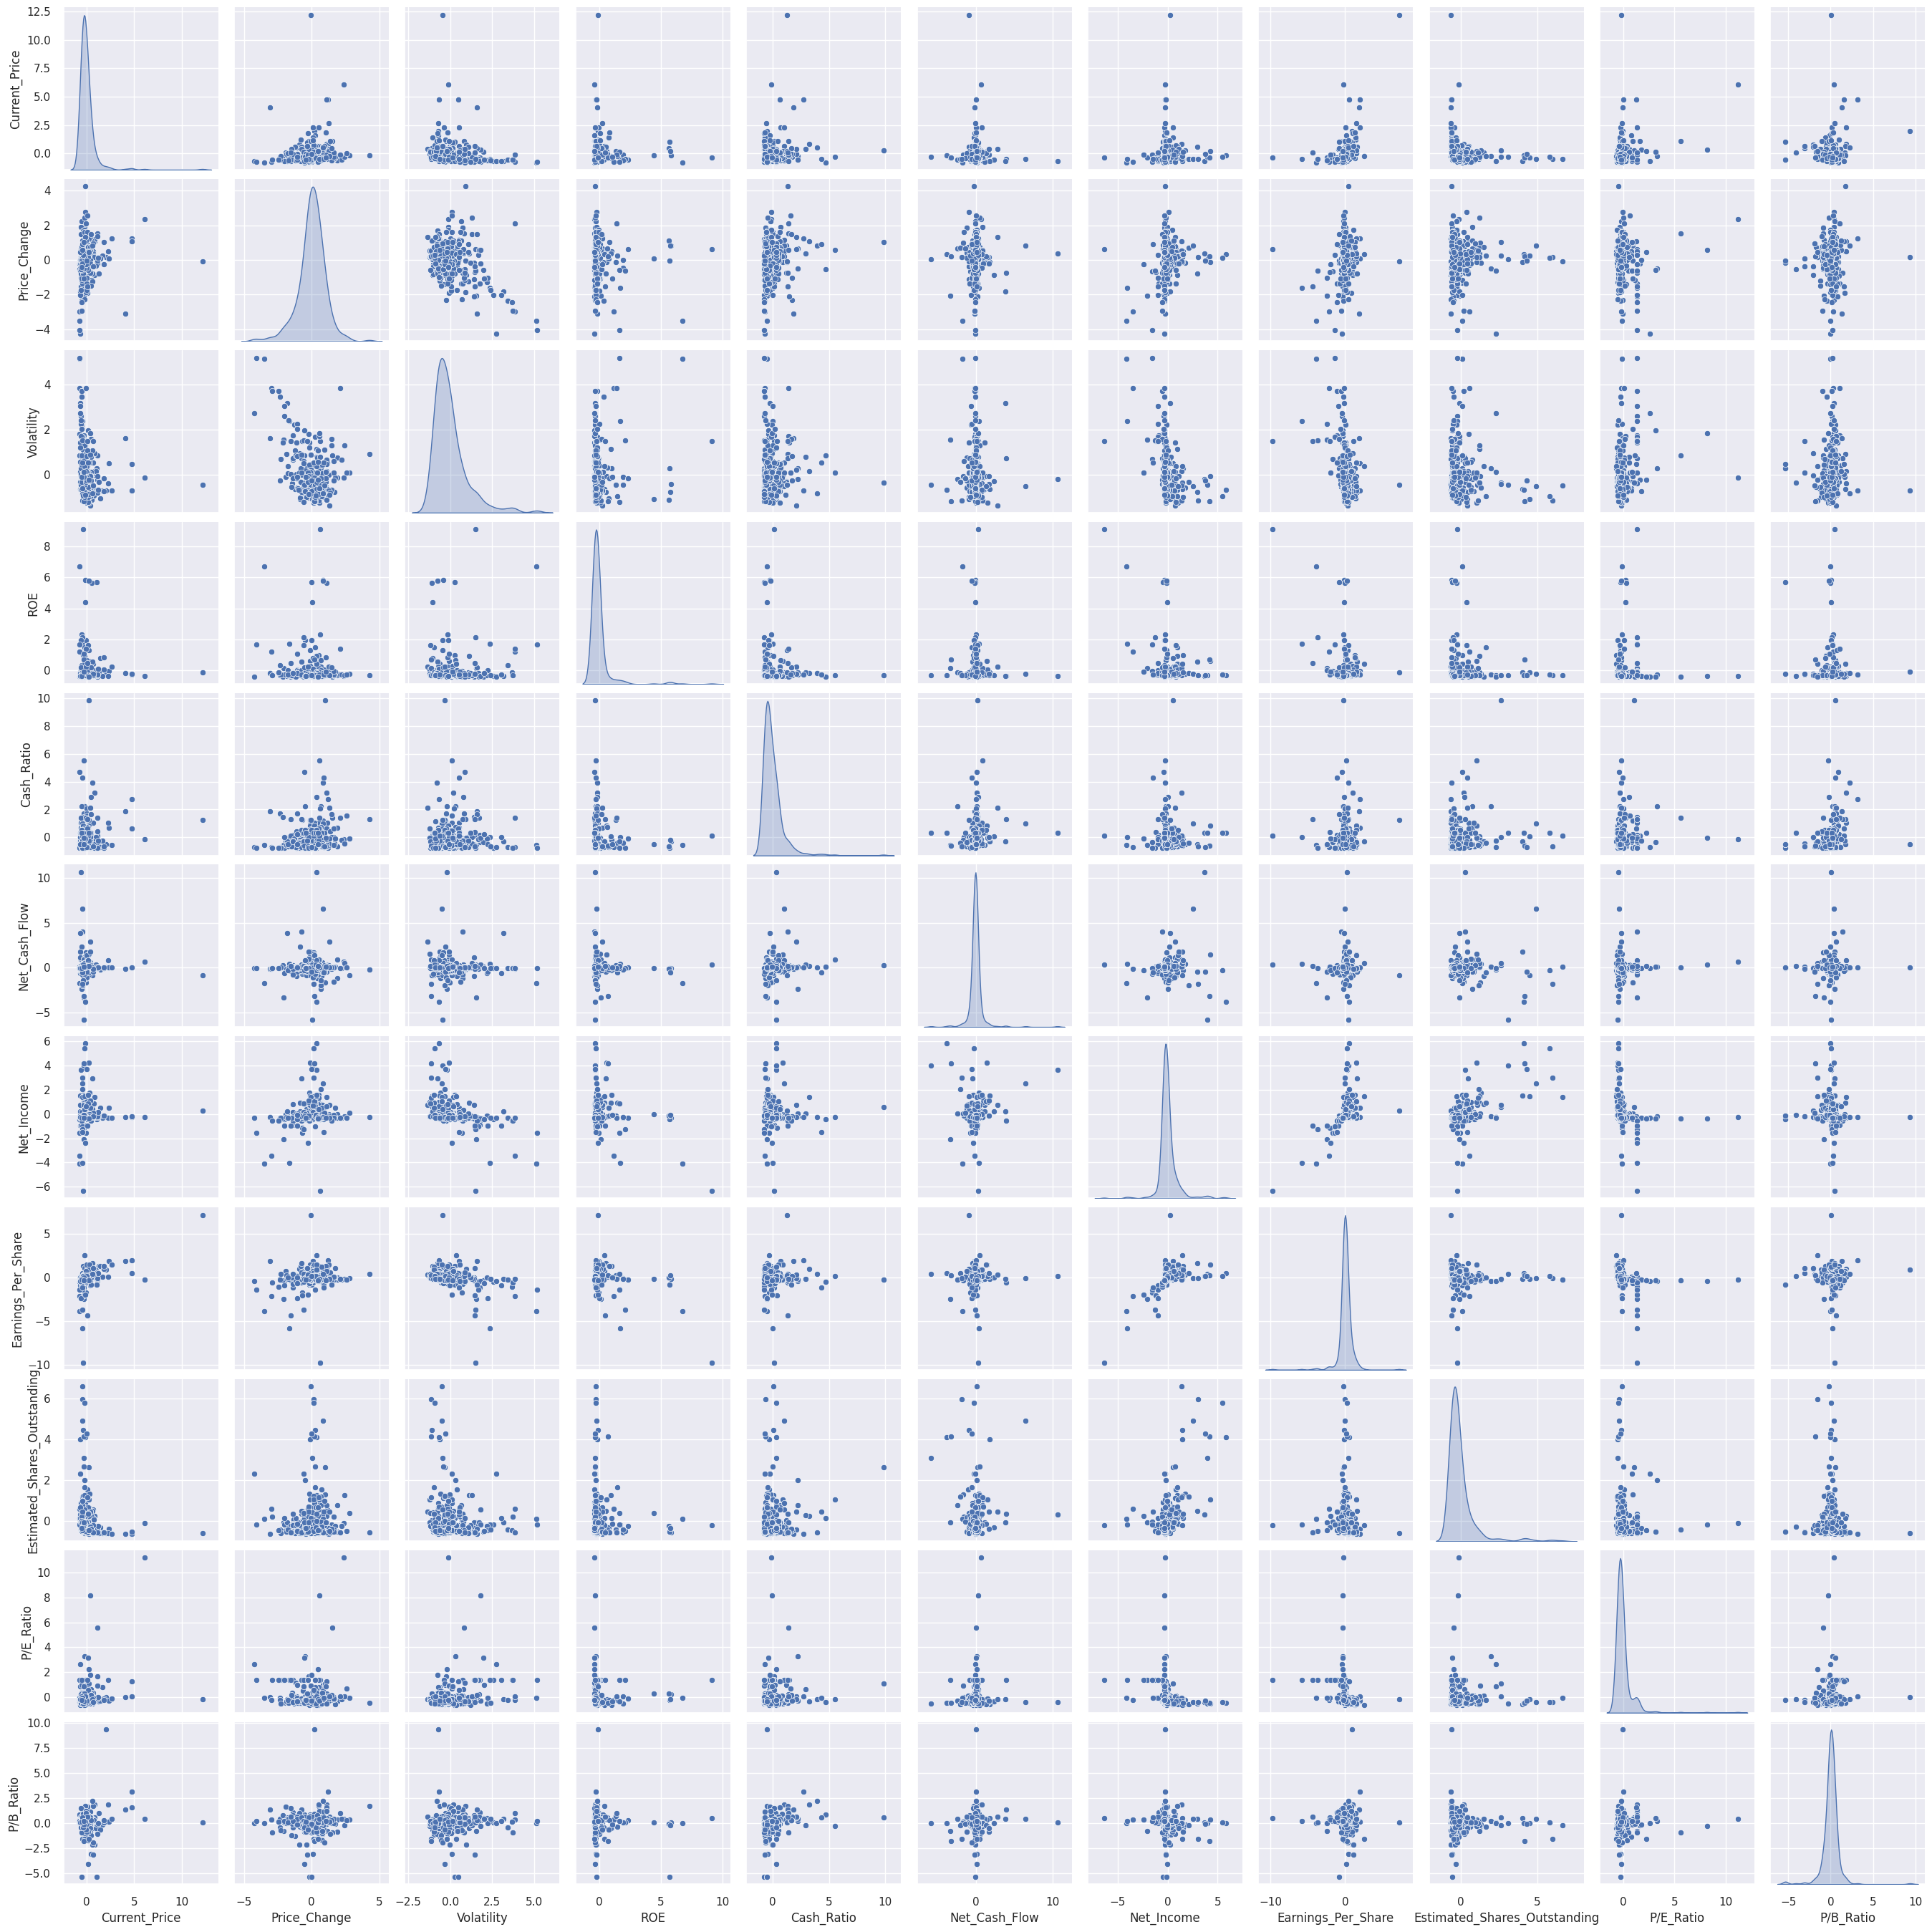

In [59]:
# Pair-plot analysis

sns.pairplot(subset_scaled_df ,diag_kind="kde");

## K-means Clustering

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1986174965225325
Number of Clusters: 5 	Average Distortion: 2.1422417534076947
Number of Clusters: 6 	Average Distortion: 2.0723738672809824
Number of Clusters: 7 	Average Distortion: 2.0178725181545314
Number of Clusters: 8 	Average Distortion: 2.0024576603862245


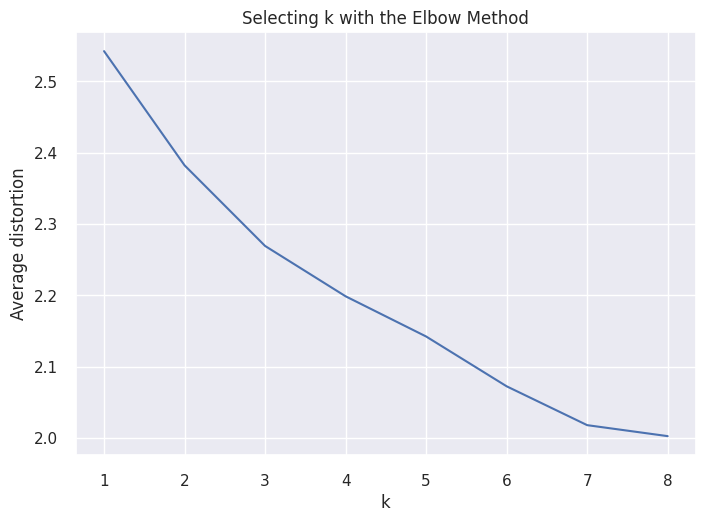

In [74]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

For n_clusters = 2, silhouette score is 0.43969639509980457
For n_clusters = 3, silhouette score is 0.46288221478751007
For n_clusters = 4, silhouette score is 0.45040157643364004
For n_clusters = 5, silhouette score is 0.40999356683171667
For n_clusters = 6, silhouette score is 0.43811723612085113
For n_clusters = 7, silhouette score is 0.4084552454873559
For n_clusters = 8, silhouette score is 0.4155198540218143
For n_clusters = 9, silhouette score is 0.43469939265862173


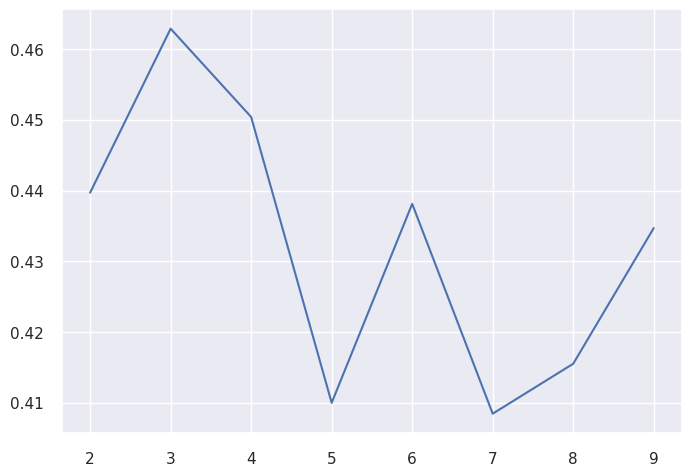

In [75]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

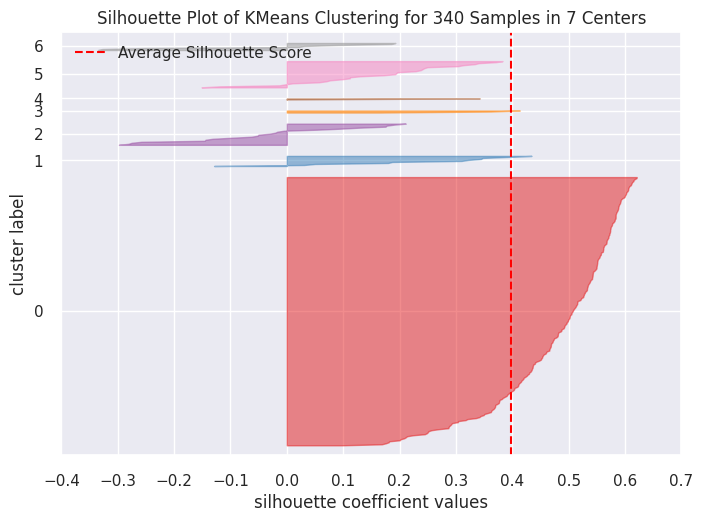

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [76]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

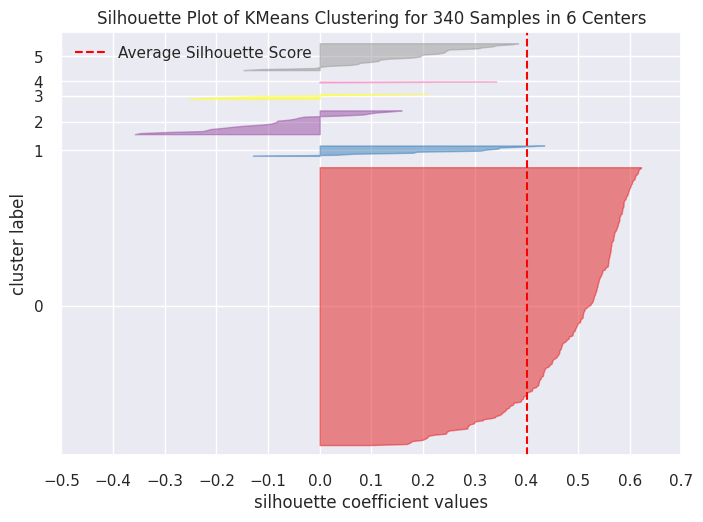

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [77]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

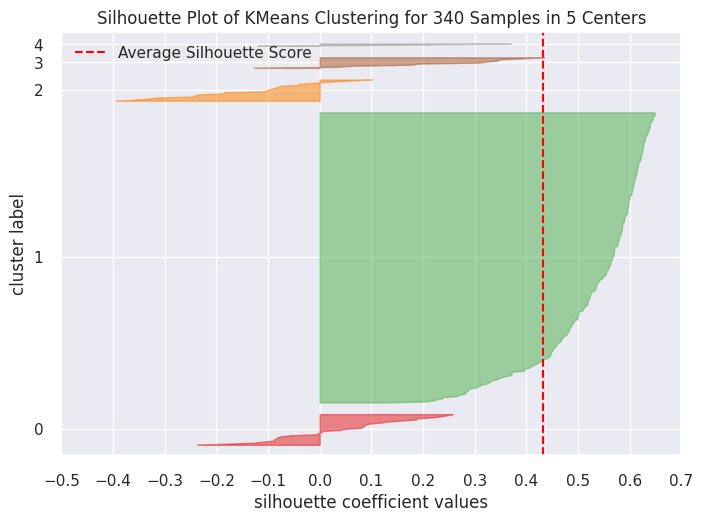

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [78]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

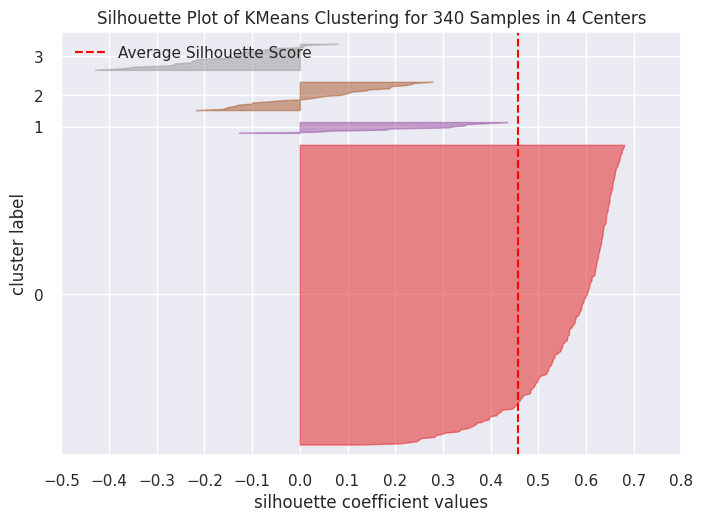

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [79]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

### Selecting final model

**Let's take 5 as the appropriate no. of clusters as the silhouette score is high enough and there is knick at 5 in the elbow curve.**

In [80]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=5, random_state=0)

In [82]:
# adding kmeans cluster labels to the original dataframe
df["K_means_segments"] = kmeans.labels_

In [84]:
cluster_profile = df.groupby('K_means_segments').mean()

In [85]:
cluster_profile['count_in_each_segments'] = df.groupby('K_means_segments')['Security'].count().values

In [86]:
cluster_profile

Current_Price  Price_Change  Volatility         ROE  \
K_means_segments                                                        
0                    246.574304     14.284326    1.769621   26.500000   
1                     41.373681    -14.849938    2.596790   27.285714   
2                     48.103077      6.053507    1.163964   27.538462   
3                     72.783335      0.912232    2.015435  542.666667   
4                     72.768128      5.701175    1.359857   25.598456   

                  Cash_Ratio  Net_Cash_Flow    Net_Income  Earnings_Per_Share  \
K_means_segments                                                                
0                 279.916667   4.591202e+08  1.009206e+09            6.167917   
1                  64.457143   3.446266e+07 -1.293864e+09           -2.459714   
2                  77.230769   7.732308e+08  1.411492e+10            3.958462   
3                  34.000000  -3.508667e+08 -5.843678e+09          -14.735556   
4                  52.216216  -9.130811e+05  1.537661e+09            3.719247   

                  Estimated_Shares_Outstanding  P/E_Ratio  P/B_Ratio  \
K_means_segments                                                       
0                                 5.494321e+08  90.097512  14.081386   
1                                 4.501004e+08  61.563930   2.476202   
2                                 3.918735e+09  16.098039  -4.253404   
3                                 3.725000e+08  53.574485  -8.831054   
4                                 4.361146e+08  23.473934  -3.374716   

                  count_in_each_segments  
K_means_segments                          
0                                     24  
1                                     35  
2                                     13  
3                                      9  
4                                    259

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_df[num_col[counter]],
        x=subset_scaled_df["K_means_segments"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

In [ ]:
fig, axes = plt.subplots(3, 4,  figsize=(20, 16))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(3):
    for jj in range(4):
        if counter <11:
            sns.boxplot(ax=axes[ii, jj],y=subset_scaled_df[num_cols[counter]],x=subset_scaled_df['K_means_segments'])
        counter = counter+1

fig.tight_layout(pad=2.0)

## Hierarchical Clustering

In [95]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736
Cophenetic correlation for Ma

In [96]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage


In [97]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922
Cophenetic correlation for complete linkage is 0.7873280186580672
Cophenetic correlation for average linkage is 0.9422540609560814
Cophenetic correlation for centroid linkage is 0.9314012446828154
Cophenetic correlation for ward linkage is 0.7101180299865353
Cophenetic correlation for weighted linkage is 0.8693784298129404


In [98]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage


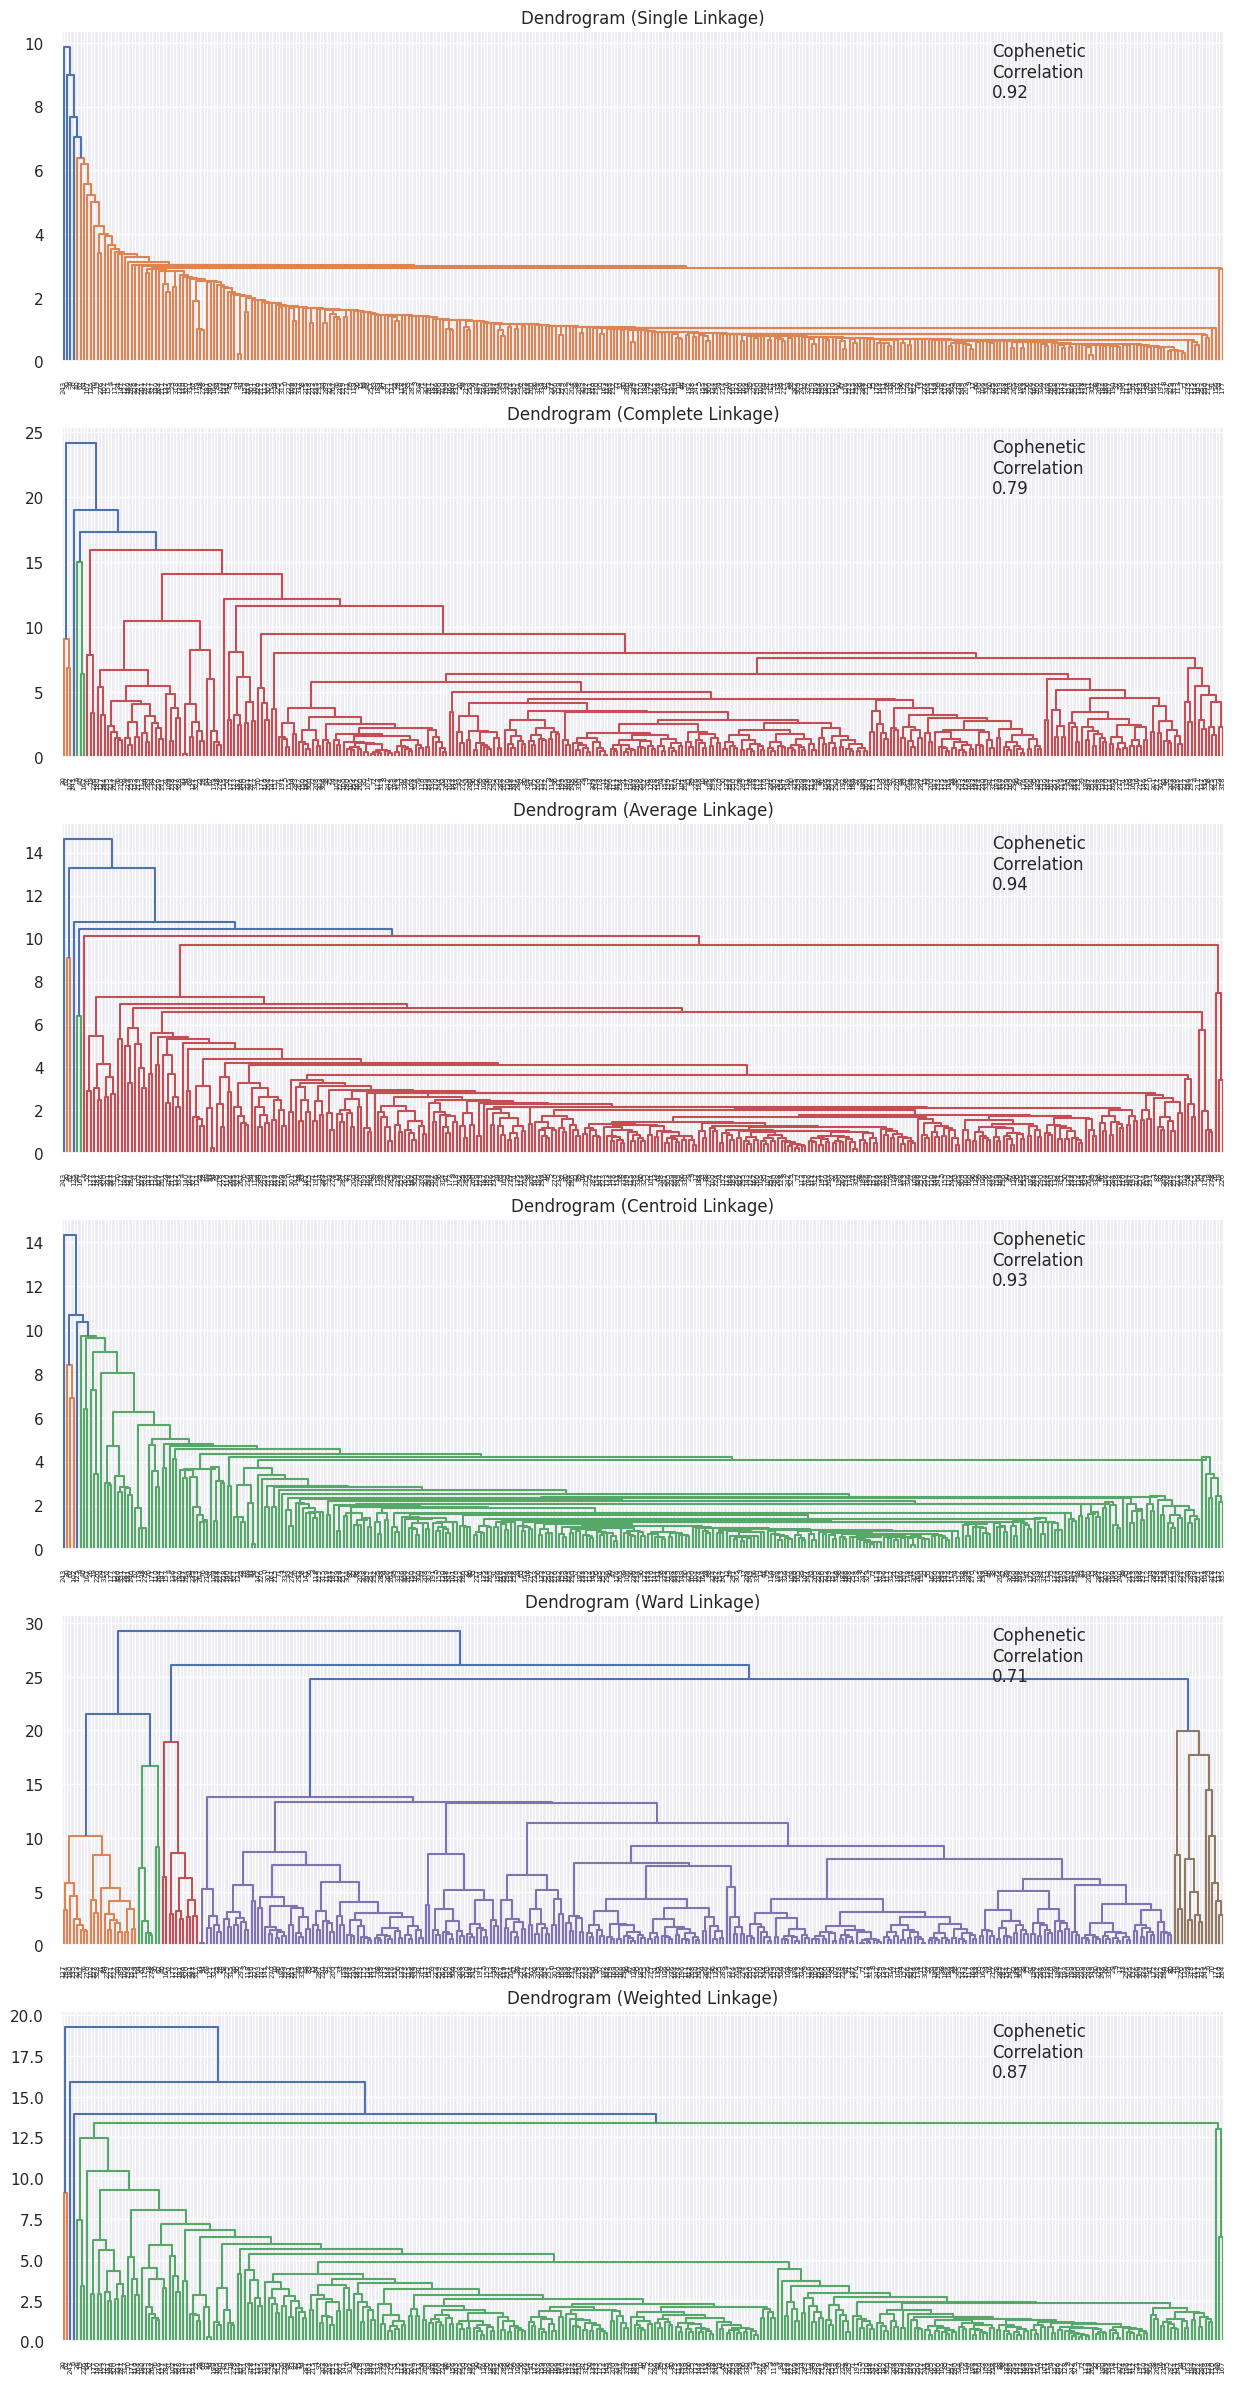

In [99]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

In [100]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=6)

In [105]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

In [106]:
cluster_profile = df.groupby("HC_Clusters").mean()

In [107]:

cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Security"].count().values
)


In [108]:
cluster_profile

Current_Price  Price_Change  Volatility         ROE  Cash_Ratio  \
HC_Clusters                                                                    
0                77.287589      4.099730    1.518066   35.336336   66.900901   
1                25.640000     11.237908    1.322355   12.500000  130.500000   
2                24.485001    -13.351992    3.482611  802.000000   51.000000   
3               104.660004     16.224320    1.320606    8.000000  958.000000   
4              1274.949951      3.190527    1.268340   29.000000  184.000000   
5               276.570007      6.189286    1.116976   30.000000   25.000000   

             Net_Cash_Flow    Net_Income  Earnings_Per_Share  \
HC_Clusters                                                    
0            -3.319732e+07  1.538075e+09             2.88527   
1             1.675550e+10  1.365400e+10             3.29500   
2            -1.292500e+09 -1.910650e+10           -41.81500   
3             5.920000e+08  3.669000e+09             1.31000   
4            -1.671386e+09  2.551360e+09            50.09000   
5             9.088500e+07  5.965410e+08             8.91000   

             Estimated_Shares_Outstanding  P/E_Ratio   P/B_Ratio  \
HC_Clusters                                                        
0                            5.605050e+08  32.441706   -2.174921   
1                            2.791829e+09  13.649696    1.508484   
2                            5.195740e+08  60.748608    1.565141   
3                            2.800763e+09  79.893133    5.884467   
4                            5.093552e+07  25.453183   -1.052429   
5                            6.695185e+07  31.040405  129.064585   

             K_means_segments  count_in_each_segments  
HC_Clusters                                            
0                    3.345345                     333  
1                    2.000000                       2  
2                    3.000000                       2  
3                    0.000000                       1  
4                    0.000000                       1  
5                    0.000000                       1

In [109]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [110]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

In [111]:
cluster_profile = df.groupby("HC_Clusters").mean()

In [112]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Security"].count().values
)

In [113]:
cluster_profile

Current_Price  Price_Change  Volatility         ROE  Cash_Ratio  \
HC_Clusters                                                                    
0                48.006208    -11.263107    2.590247  196.551724   40.275862   
1               213.518640     15.252913    1.779861   22.333333  258.740741   
2                46.672222      5.166566    1.079367   25.000000   58.333333   
3                72.421687      4.563230    1.403434   25.218182   55.014545   

             Net_Cash_Flow    Net_Income  Earnings_Per_Share  \
HC_Clusters                                                    
0            -4.959017e+08 -3.597245e+09           -8.689655   
1             1.504053e+09  1.716530e+09            5.177407   
2            -3.040667e+09  1.484844e+10            3.435556   
3             7.280187e+07  1.572467e+09            3.728564   

             Estimated_Shares_Outstanding  P/E_Ratio  P/B_Ratio  \
HC_Clusters                                                       
0                            4.863198e+08  75.110924  -2.162622   
1                            6.898383e+08  78.441603  13.022590   
2                            4.564960e+09  15.596051  -6.354193   
3                            4.450039e+08  24.188244  -2.966949   

             K_means_segments  count_in_each_segments  
HC_Clusters                                            
0                    1.620690                      29  
1                    0.629630                      27  
2                    2.000000                       9  
3                    3.789091                     275

In [114]:
# let's see the names of the securities in each cluster
for cl in df["HC_Clusters"].unique():
    print(
        "The",
        df[df["HC_Clusters"] == cl]["Security"].nunique(),
        "Securities in cluster",
        cl,
        "are:",
    )
    print(df[df["HC_Clusters"] == cl]["Security"].unique())
    print("-" * 100, "\n")

The 275 Securities in cluster 3 are:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Arconic Inc' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'American Water Works Company Inc'
 'American Express Co' 'Boeing Company' 'Baxter International Inc.'
 'BB&T Corporation' 'Bard (C.R.) Inc.' 'BIOGEN IDEC Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle International Corp.'
 'Carnival Corp

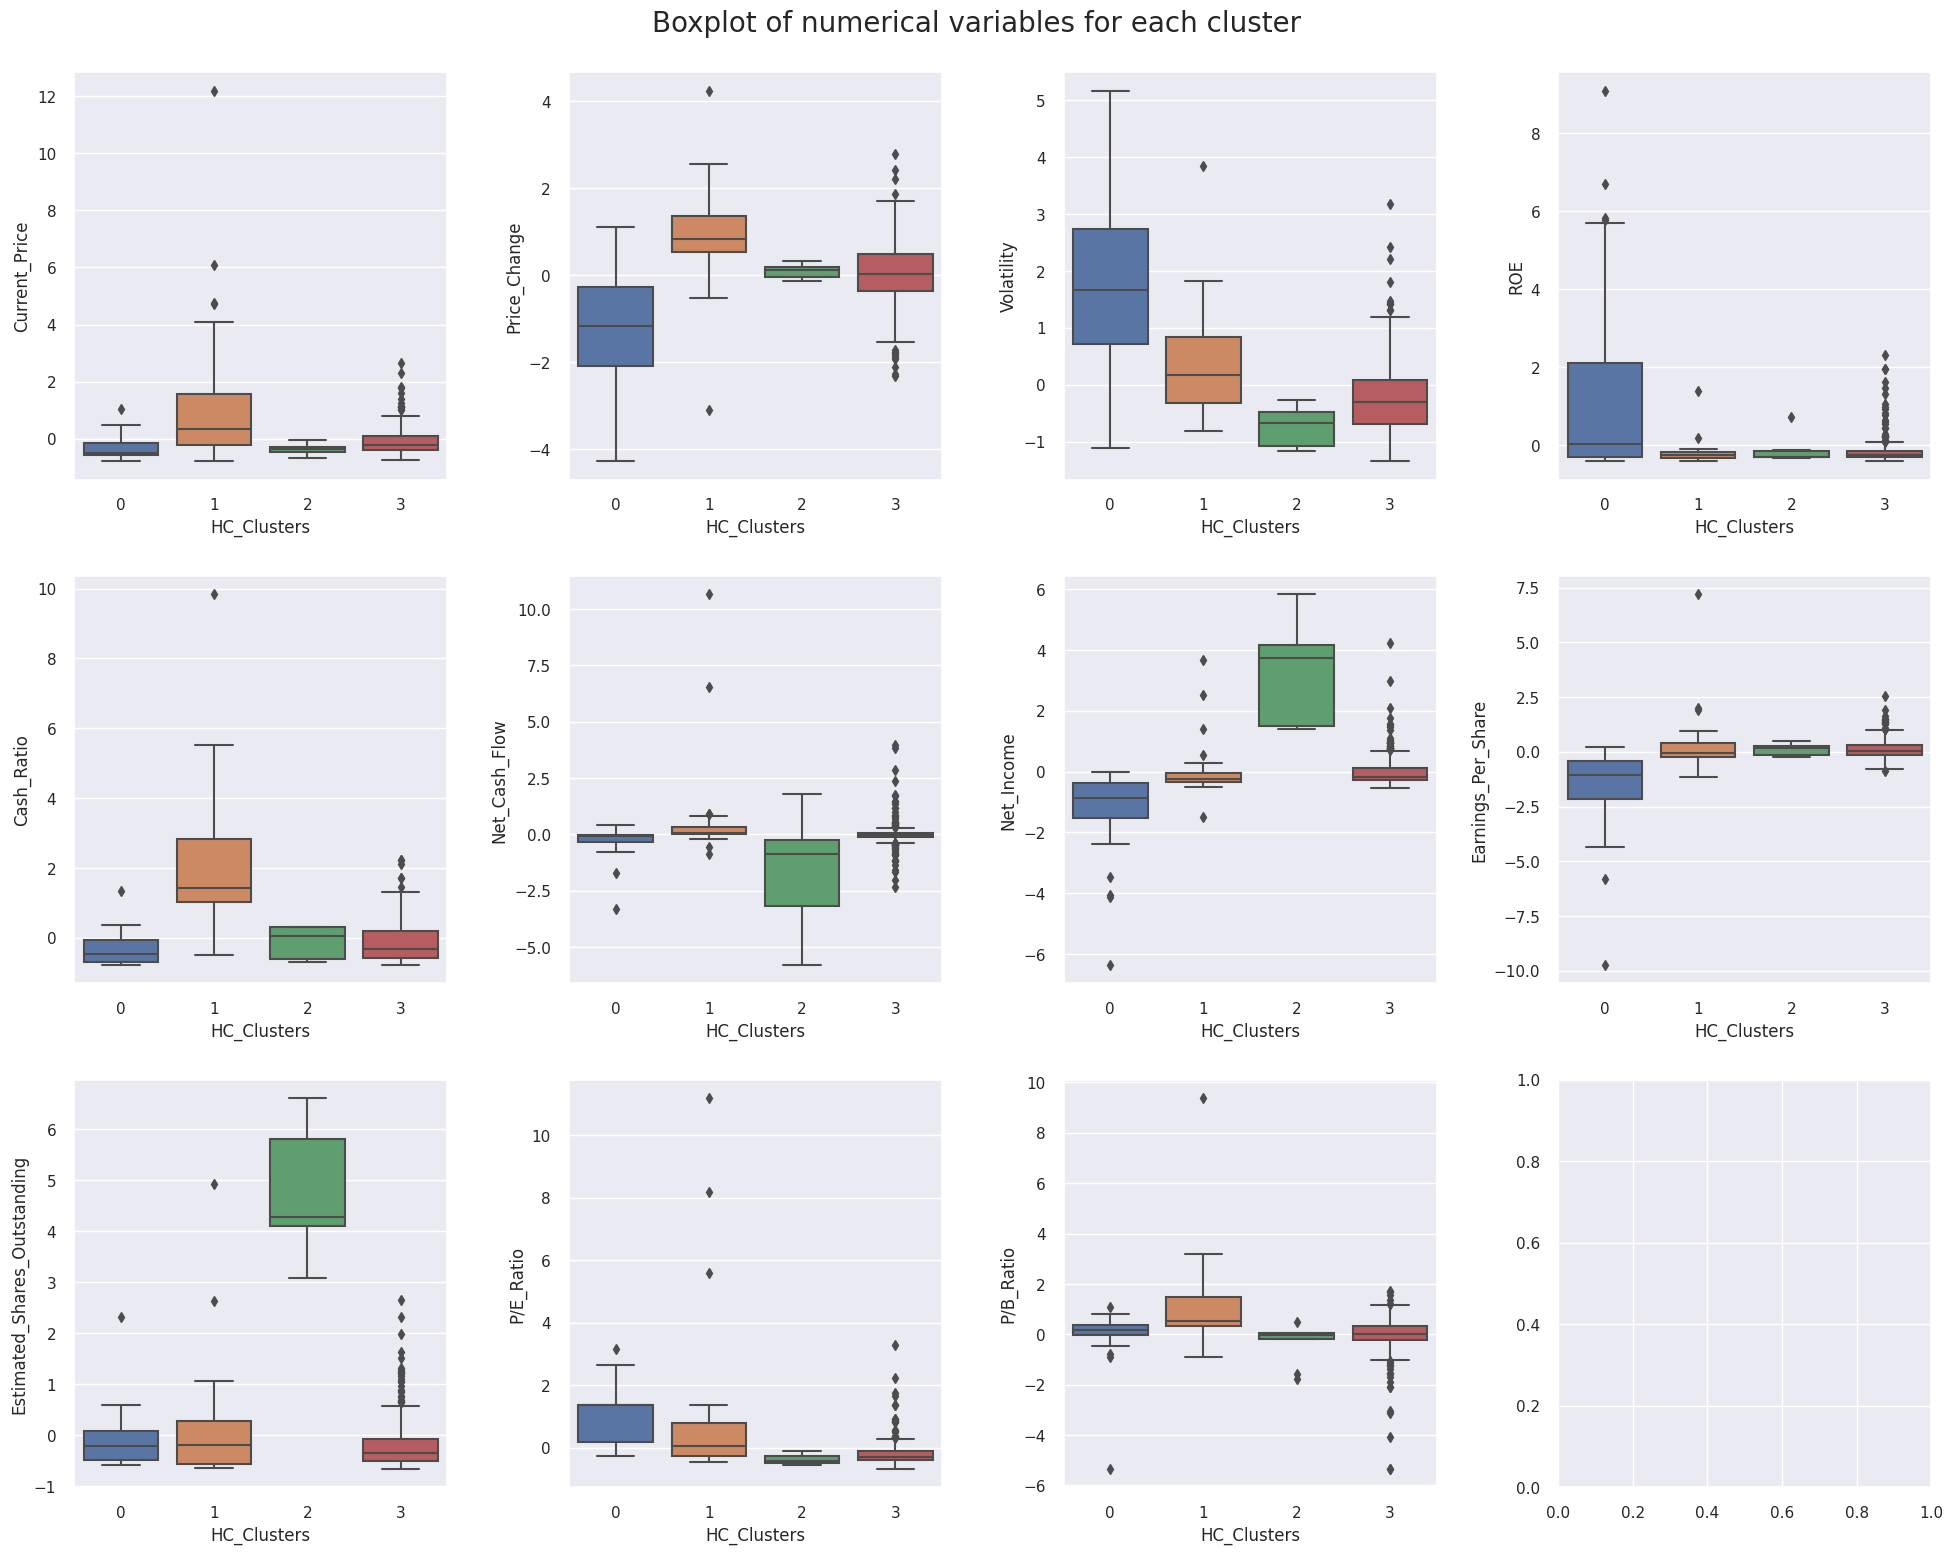

In [115]:
fig, axes = plt.subplots(3, 4,  figsize=(20, 16))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(3):
    for jj in range(4):
        if counter <11:
            sns.boxplot(ax=axes[ii, jj],y=subset_scaled_df[num_cols[counter]],x=subset_scaled_df['HC_Clusters'])
        counter = counter+1

fig.tight_layout(pad=2.0)

In [116]:
# Comparing cluster vs. GICS_Sector

pd.crosstab(df.GICS_Sector, df.HC_Clusters).style.highlight_max(color = 'lightgreen', axis = 0)

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

In [ ]:
# Comparing Hierarchical cluster vs. K-means  cluster

pd.crosstab(df.K_means_segments, df.HC_Clusters).style.highlight_max(color = 'lightgreen', axis = 0)

In [ ]:
# PCA to reduce the data to two dimensions and visualize it to see how well-separated the clusters are

# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(subset_scaled_df)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

In [ ]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

In [ ]:
# Scatterplot by cluster labels - K-Means Clustering
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df["K_means_segments"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

## Actionable Insights and Recommendations

-